In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib widget
import os
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit

In [2]:
data_all = np.loadtxt('exp_results/PV_4folds_R10_new.csv', skiprows = 2, delimiter = ',', usecols = tuple(range(6)))
vol_all = data_all[:,0]
pressure_all = np.mean(data_all[:,1:], axis = 1)


#note: checked and this is averaged correctly w/o any extra volume stuff

R = 10 #mm
H = 18 #mm
vol_0 = np.pi * R * R * H * 1e-3 #mm^3 * 1000 should be cm^3 aka mL
pressure_0 = pressure_all[0]

index for \Delta V/V_0 = 0.69: 105
[-0.          0.0709931   0.39916881  0.69143547]


(-3.0, 0.01)

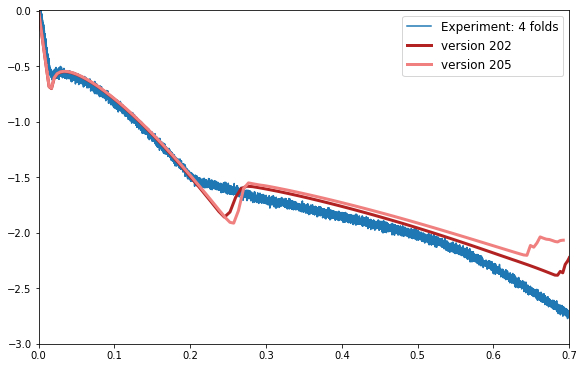

In [10]:

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (8,5), constrained_layout = True)
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])

exp_in = 'exp_results'
num_folds = 4
p_cr = 0.384
E = 1.2
t = 0.54
# exp_res = np.load(f'{exp_in}/PV_{num_folds}folds_smoothed.npz')
# ax.plot(exp_res['vol_norm'] + eps, exp_res['pressure_mean'], linewidth = 3, label = f'experiment {num_folds}folds')
# ax.fill_between(exp_res['vol_norm'] + eps, exp_res['pressure_mean'] - exp_res['pressure_std'], exp_res['pressure_mean'] + exp_res['pressure_std'], alpha = 0.3)

ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 4 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

idx_cur = 202
data_cur = np.loadtxt(f'data_out/sim-long-{num_folds}folds-{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = 'firebrick'
ax.plot(vol_norm,pressure_kpa, label = f'version {idx_cur}', color = color_plot,linewidth = 3)

vol_sp = 0.69
print(f'index for \Delta V/V_0 = {vol_sp}: {np.argmin(np.abs(vol_norm-vol_sp))}')
f_used = [0, 25, 57, 105]
print(vol_norm[f_used])


############################

idx_cur = 205 
data_cur = np.loadtxt(f'data_out/sim-long-{num_folds}folds-{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = 'lightcoral'
ax.plot(vol_norm,pressure_kpa, label = f'version {idx_cur}', color = color_plot,linewidth = 3)


ax.legend(loc = 'best', fontsize = 12)
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -3)

# fig.savefig('scream yi/3folds_fitting.png', facecolor = 'white')

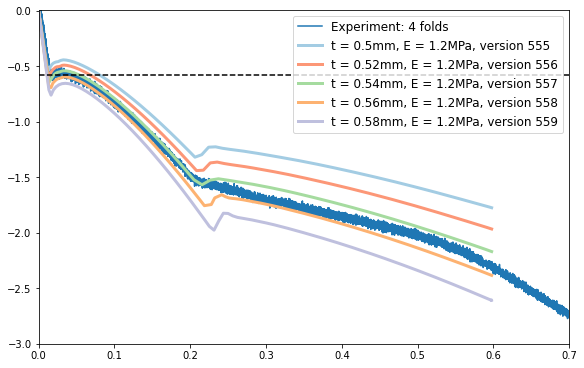

In [5]:
E_try = [1.1, 1.2, 1.3, 1.4]
t_try = [0.50, 0.52, 0.54, 0.56, 0.58]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (8, 5), constrained_layout = True)
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])

initial_idx = 550
p_cr = 0.579


ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 4 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        if E == 1.2:
            idx_cur = initial_idx + len(t_try)*j + i
            data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
            vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
            pressure_kpa = data_cur[:,1] * 1e3

            #j/(len(t_try) - 1)*0.85+0.15
            color_plot = plt.get_cmap(cmap_all[i])((j/(len(t_try) - 1))*0.85 + 0.15)
            ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa, version {idx_cur}', color = color_plot,
                linewidth = 3)

ax.hlines(-p_cr, 0, 0.7, 'k', '--')
ax.legend(loc = 'best', fontsize = 12)
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -3)

fig.savefig('scream yi/4folds_fitting.png', facecolor = 'white')

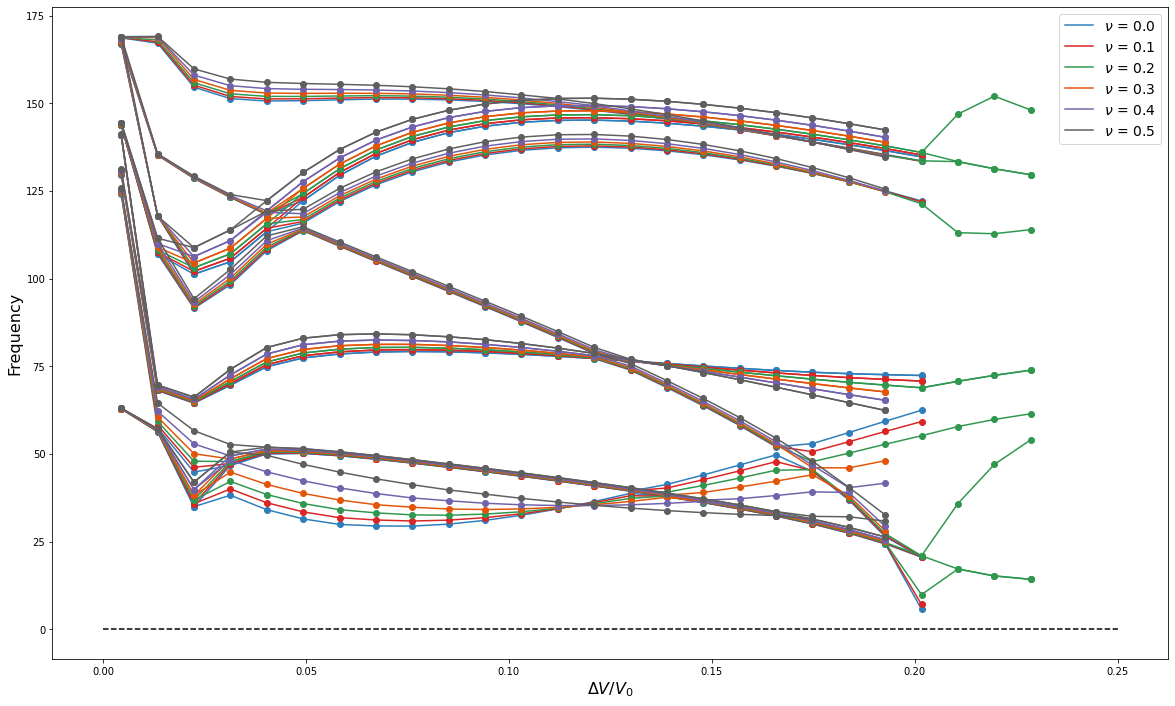

In [8]:
nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 900

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

for i,nu in enumerate(nu_try):
    if nu >= 0.0:
        idx_cur = initial_idx + i
        data_path = f'data_out/4fold-test_nu-{idx_cur}_eig_freq.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            ax.plot(-3*temp_all, freq_all[:,j], 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, label = rf'$\nu$ = {nu}')
            else:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Frequency', fontsize = 16)
ax.hlines(0,0,0.25,'k','--')


fig.savefig('data_processed/change_nu_4folds_freq.jpg')


damping sweep 4folds 1

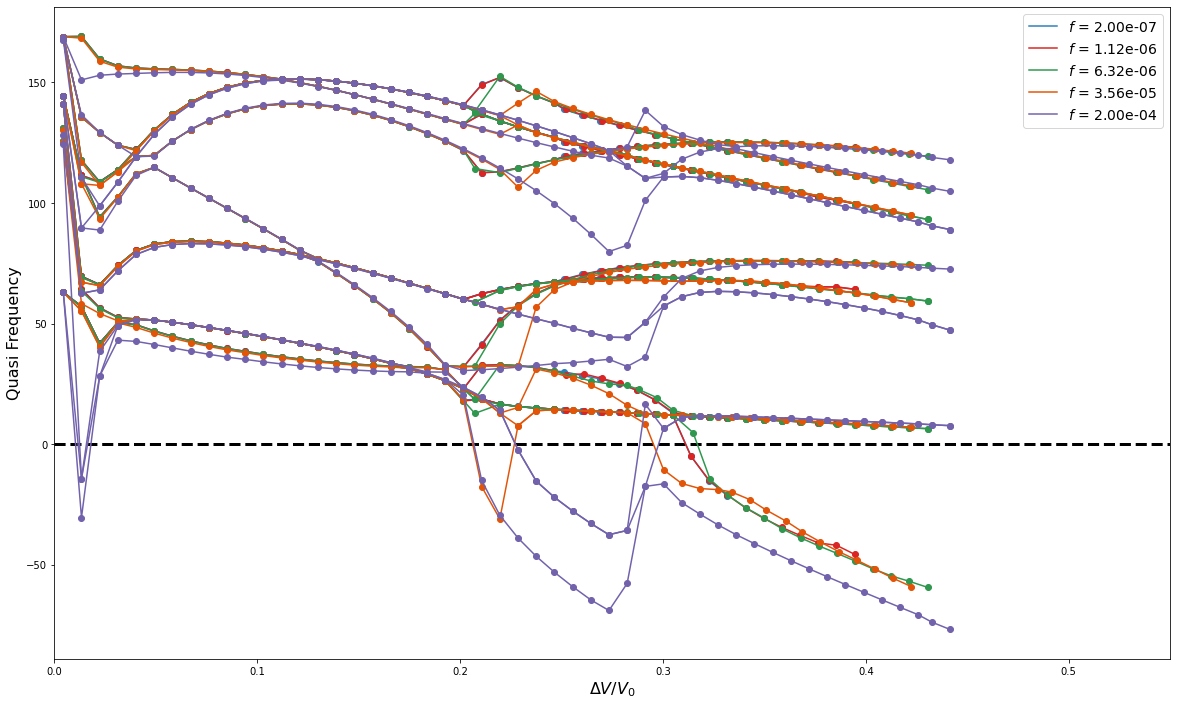

In [12]:
damping_sweep = 2*np.logspace(-7, -4, 5)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 330

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']

ax.hlines(0,0,0.55, 'k', '--', linewidth = 3)

for i,stab_fac in enumerate(damping_sweep):
    if i < 5:
        idx_cur = initial_idx + i
        data_path = f'data_out/4fold-test_static-stable-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            freq_rescale = np.sign(freq_all[:,j]) * np.sqrt(np.abs(freq_all[:,j])) * 1/(2*np.pi)
            ax.plot(-3*temp_all, freq_rescale, 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot, label = rf'$f$ = {stab_fac:.2e}')
            else:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Quasi Frequency', fontsize = 16)
ax.set_xlim(0,0.55)


fig.savefig('data_processed/static_stable_4folds.jpg')


(-2.5, 0.0)

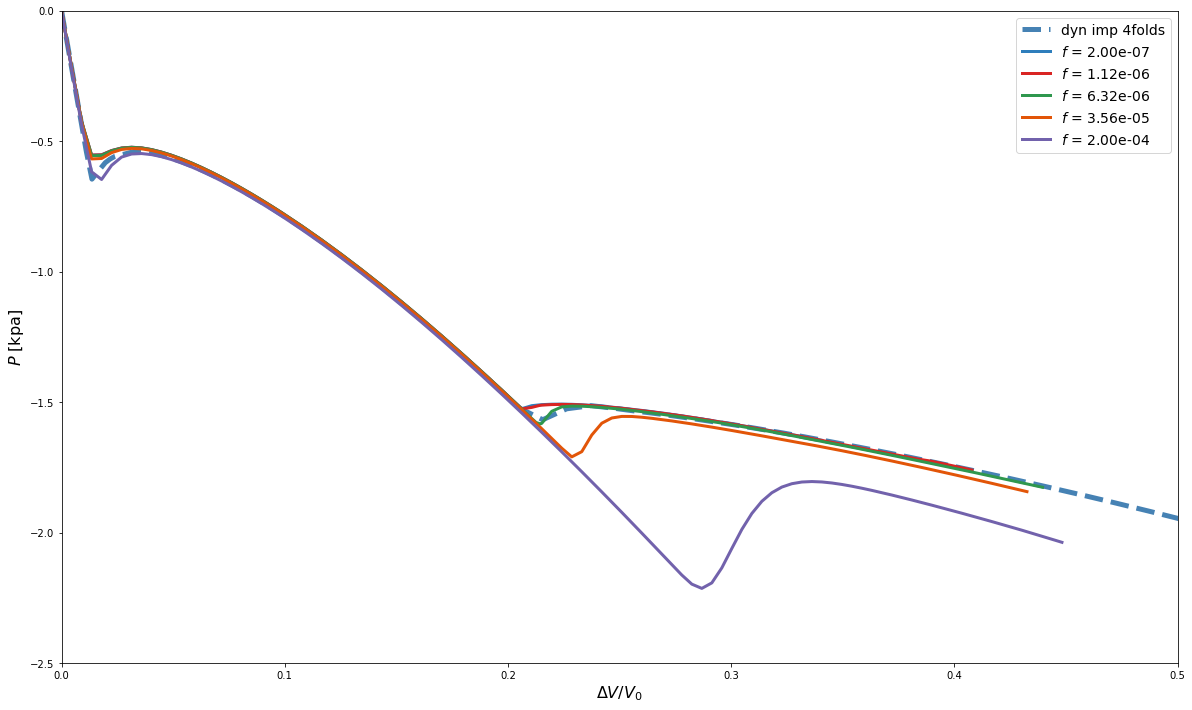

In [16]:
damping_sweep = 2*np.logspace(-7, -4, 5)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 330

idx_cur = 557
data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3
# print(data_cur[0,0])

ax.plot(vol_norm,pressure_kpa, '--', label = 'dyn imp 4folds', color = 'steelblue', linewidth = 5)

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']


for i,stab_fac in enumerate(damping_sweep):
    try:
        idx_cur = initial_idx + i
        data_path = f'data_out/4fold-test_static-stable-{idx_cur}_pcav_cvol.txt'
        data_cur = np.loadtxt(data_path)
        
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        ax.plot(vol_norm,pressure_kpa, label = rf'$f$ = {stab_fac:.2e}', color = color_plot, linewidth = 3)
    except: pass



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('$P$ [kpa]', fontsize = 16)
ax.set_xlim(0,0.5)
ax.set_ylim(-2.5,0)

(-2.5, 0.0)

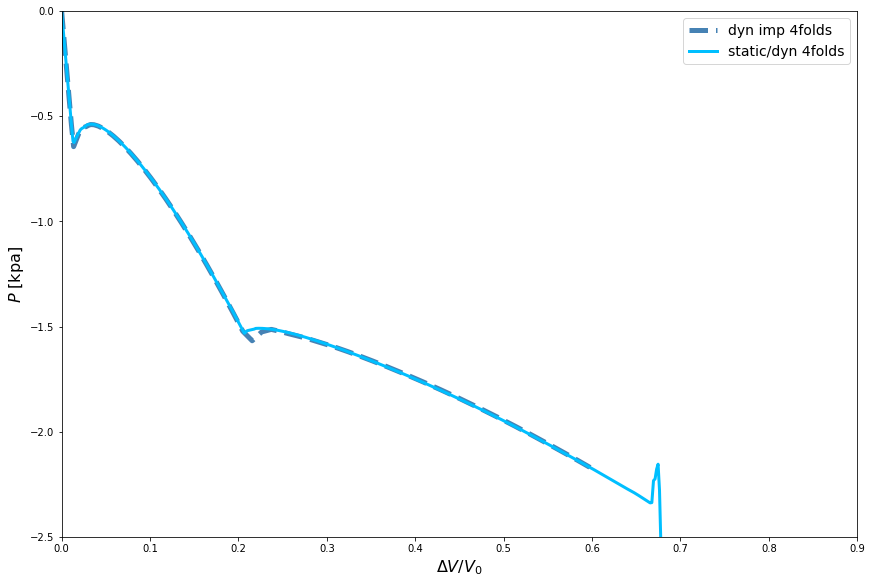

In [7]:
fig, ax = plt.subplots(figsize = (12,8), constrained_layout = True)


idx_cur = 557
data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3
# print(data_cur[0,0])

ax.plot(vol_norm,pressure_kpa, '--', label = 'dyn imp 4folds', color = 'steelblue', linewidth = 5)

idx_cur = 219
data_cur = np.loadtxt(f'data_out/sim-long-4folds-{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

ax.plot(vol_norm,pressure_kpa, label = 'static/dyn 4folds', color = 'deepskyblue', linewidth = 3)

ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('$P$ [kpa]', fontsize = 16)
ax.set_xlim(0,0.9)
ax.set_ylim(-2.5,0)

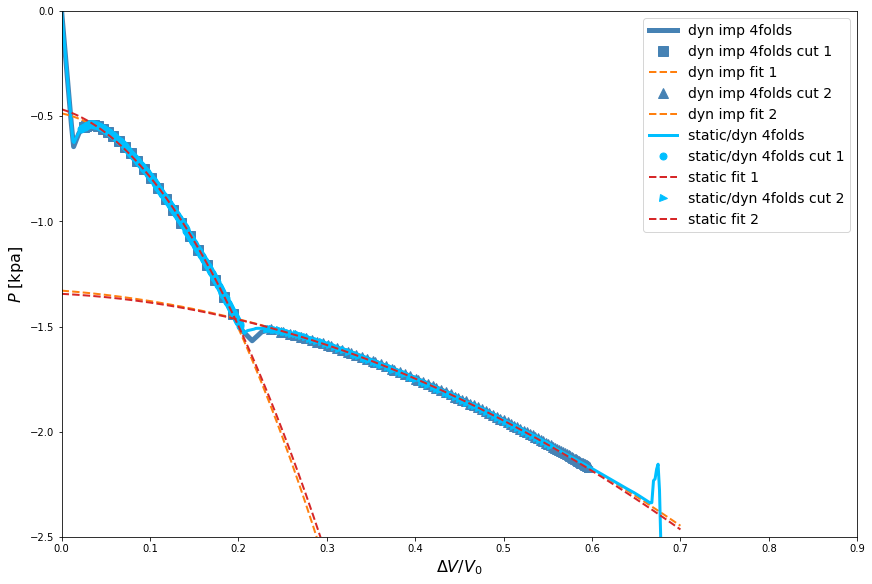

In [68]:
'''messing around w/ plots to see if there's a nice scaling to be had'''

def curve_quadratic(x, a, b, c):
    return a*x**2 + b*x + c

def rescale_pressure(pressure_kpa, rule):
    pressure_abs = np.abs(pressure_kpa)
    if rule == 'sqrt':
        return -np.sqrt(pressure_abs)
    elif rule == 'log':
        return -np.log(pressure_abs)
    elif rule == None:
        return pressure_kpa

pretend_vol = np.linspace(0, 0.7, 500)

fig, ax = plt.subplots(figsize = (12,8), constrained_layout = True)

rule_test = None

idx_cur = 557
data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3
# print(data_cur[0,0])
idx_start = 20
idx_end = 45
ax.plot(vol_norm, rescale_pressure(pressure_kpa, rule_test), label = 'dyn imp 4folds', color = 'steelblue', linewidth = 5)
ax.plot(vol_norm[idx_start:idx_end], rescale_pressure(pressure_kpa, rule_test)[idx_start:idx_end], 's', label = 'dyn imp 4folds cut 1', color = 'steelblue', markersize = 10)

popt, pcov = curve_fit(curve_quadratic, vol_norm[idx_start:idx_end], rescale_pressure(pressure_kpa, rule_test)[idx_start:idx_end])

ax.plot(pretend_vol, curve_quadratic(pretend_vol, popt[0], popt[1], popt[2]), '--', linewidth = 2, color = 'tab:orange', label = 'dyn imp fit 1')

idx_start = 48
idx_end = 150
ax.plot(vol_norm[idx_start:idx_end], rescale_pressure(pressure_kpa, rule_test)[idx_start:idx_end], '^', label = 'dyn imp 4folds cut 2', color = 'steelblue', markersize = 10)
popt, pcov = curve_fit(curve_quadratic, vol_norm[idx_start:idx_end], rescale_pressure(pressure_kpa, rule_test)[idx_start:idx_end])
ax.plot(pretend_vol, curve_quadratic(pretend_vol, popt[0], popt[1], popt[2]), '--', linewidth = 2, color = 'tab:orange', label = 'dyn imp fit 2')

idx_cur = 219
data_cur = np.loadtxt(f'data_out/sim-long-4folds-{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

idx_start = 20
idx_end = 185
ax.plot(vol_norm,rescale_pressure(pressure_kpa, rule_test), label = 'static/dyn 4folds', color = 'deepskyblue', linewidth = 3)
ax.plot(vol_norm[idx_start:idx_end],rescale_pressure(pressure_kpa, rule_test)[idx_start:idx_end], 'o', label = 'static/dyn 4folds cut 1', color = 'deepskyblue', markersize = 7)

popt, pcov = curve_fit(curve_quadratic, vol_norm[idx_start:idx_end], rescale_pressure(pressure_kpa, rule_test)[idx_start:idx_end])

ax.plot(pretend_vol, curve_quadratic(pretend_vol, popt[0], popt[1], popt[2]), '--', linewidth = 2, color = 'tab:red', label = 'static fit 1')

idx_start = 220
idx_end = 300
ax.plot(vol_norm[idx_start:idx_end], rescale_pressure(pressure_kpa, rule_test)[idx_start:idx_end], '>', label = 'static/dyn 4folds cut 2', color = 'deepskyblue', markersize = 7)
popt, pcov = curve_fit(curve_quadratic, vol_norm[idx_start:idx_end], rescale_pressure(pressure_kpa, rule_test)[idx_start:idx_end])
ax.plot(pretend_vol, curve_quadratic(pretend_vol, popt[0], popt[1], popt[2]), '--', linewidth = 2, color = 'tab:red', label = 'static fit 2')

ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('$P$ [kpa]', fontsize = 16)
ax.set_xlim(0,0.9)
ax.set_ylim(-2.5,0)

fig.savefig('scream yi/static_vs_dyn_fitting.png',facecolor = 'white')

In [ ]:
fig, ax = plt.subplots(figsize = (12,8), constrained_layout = True)


idx_cur = 557
data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3
# print(data_cur[0,0])

ax.plot(vol_norm,pressure_kpa, '--', label = 'dyn imp 4folds', color = 'steelblue', linewidth = 5)

idx_cur = 219
data_cur = np.loadtxt(f'data_out/sim-long-4folds-{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

ax.plot(vol_norm,pressure_kpa, label = 'static/dyn 4folds', color = 'deepskyblue', linewidth = 3)

ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('$P$ [kpa]', fontsize = 16)
ax.set_xlim(0,0.9)
ax.set_ylim(-2.5,0)

(-2.5, 0.0)

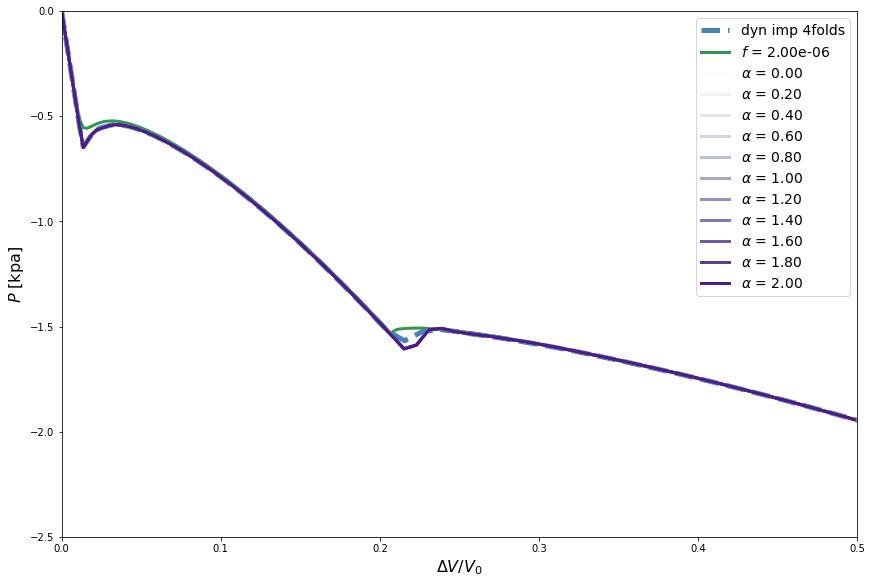

In [33]:
'''sweep over adamp vals [no change]'''
alpha_vals = np.linspace(0, 2, 11)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (12,8), constrained_layout = True)

initial_idx = 330

idx_cur = 557
data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3
# print(data_cur[0,0])

ax.plot(vol_norm,pressure_kpa, '--', label = 'dyn imp 4folds', color = 'steelblue', linewidth = 5)

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']

idx_cur = 402
data_path = f'data_out/4fold-test_static-stable-{idx_cur}_pcav_cvol.txt'
stab_fac = 2e-6
data_cur = np.loadtxt(data_path)
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = plt.get_cmap('Greens')(0.7)

ax.plot(vol_norm,pressure_kpa, label = rf'$f$ = {stab_fac:.2e}', color = color_plot, linewidth = 3)

initial_idx = 100
for i,alpha in enumerate(alpha_vals):
    data_path = f'data_out/4fold-test_damping-{initial_idx + i}_pcav_cvol.txt'
    data_cur = np.loadtxt(data_path)
    
    vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
    pressure_kpa = data_cur[:,1] * 1e3

    color_plot = plt.get_cmap('Purples')(i/len(alpha_vals))

    ax.plot(vol_norm,pressure_kpa, label = rf'$\alpha$ = {alpha:.2f}', color = color_plot, linewidth = 3)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('$P$ [kpa]', fontsize = 16)
ax.set_xlim(0,0.5)
ax.set_ylim(-2.5,0)

(-2.5, 0.0)

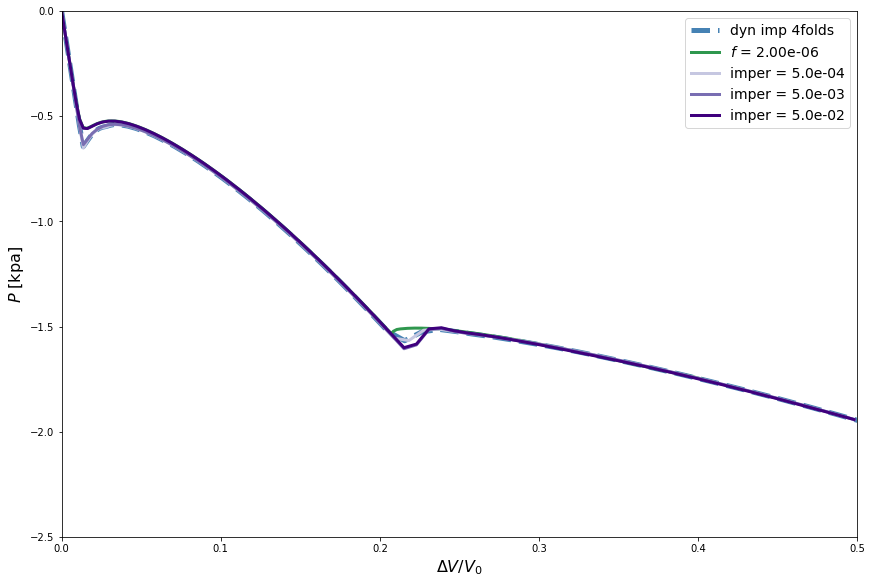

In [39]:
'''sweep over imperfection values [some change, not what I'm looking for]'''
imper_vals = 5*np.logspace(-4, -2, 3)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (12,8), constrained_layout = True)

initial_idx = 330

idx_cur = 557
data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3
# print(data_cur[0,0])

ax.plot(vol_norm,pressure_kpa, '--', label = 'dyn imp 4folds', color = 'steelblue', linewidth = 5)

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']

idx_cur = 402
data_path = f'data_out/4fold-test_static-stable-{idx_cur}_pcav_cvol.txt'
stab_fac = 2e-6
data_cur = np.loadtxt(data_path)
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = plt.get_cmap('Greens')(0.7)

ax.plot(vol_norm,pressure_kpa, label = rf'$f$ = {stab_fac:.2e}', color = color_plot, linewidth = 3)

initial_idx = 120
for i,imper in enumerate(imper_vals):
    data_path = f'data_out/4fold-test_damping-{initial_idx + i}_pcav_cvol.txt'
    data_cur = np.loadtxt(data_path)
    
    vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
    pressure_kpa = data_cur[:,1] * 1e3

    color_plot = plt.get_cmap('Purples')((i+1)/len(imper_vals))

    ax.plot(vol_norm,pressure_kpa, label = rf'imper = {imper:.1e}', color = color_plot, linewidth = 3)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('$P$ [kpa]', fontsize = 16)
ax.set_xlim(0,0.5)
ax.set_ylim(-2.5,0)

change in norm vol per step: 2.241e-03
max \Delta V_norm = 1.098e-02


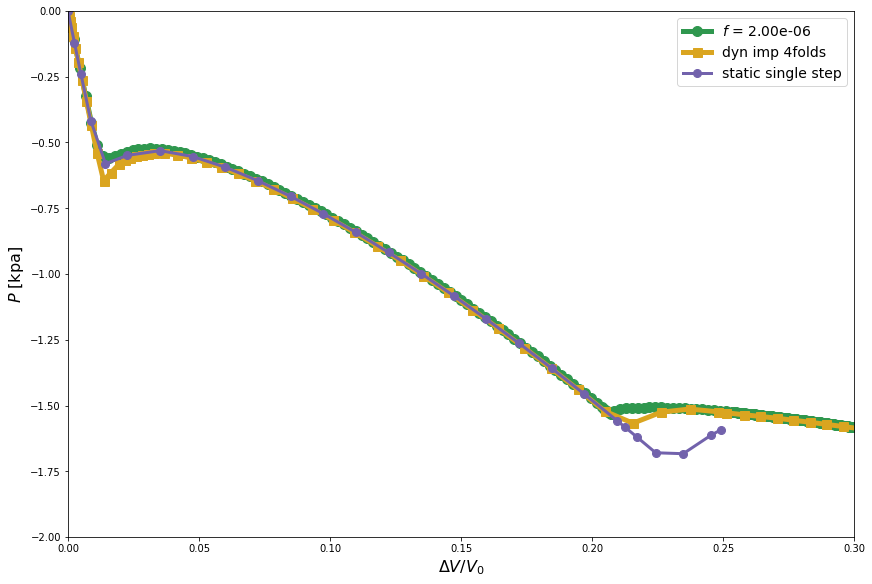

In [69]:
'''test dyn vs static multi vs static single step'''
imper_vals = 5*np.logspace(-4, -2, 3)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (12,8), constrained_layout = True)



cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']

idx_cur = 402
data_path = f'data_out/4fold-test_static-stable-{idx_cur}_pcav_cvol.txt'
stab_fac = 2e-6
data_cur = np.loadtxt(data_path)
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = plt.get_cmap('Greens')(0.7)

ax.plot(vol_norm,pressure_kpa, 'o-', label = rf'$f$ = {stab_fac:.2e}', color = color_plot, linewidth = 5, markersize = 10)
print(f'change in norm vol per step: {(vol_norm[1] - vol_norm[0]):.3e}')


idx_cur = 557
data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3
# print(data_cur[0,0])

ax.plot(vol_norm,pressure_kpa, 's-', label = 'dyn imp 4folds', color = 'goldenrod', linewidth = 5, markersize = 9)
print(f'max \Delta V_norm = {np.max(np.diff(vol_norm)):.3e}')


idx_cur = 214
data_path = f'data_out/4fold-imperfection-{idx_cur}_pcav_cvol.txt'

data_cur = np.loadtxt(data_path)
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = plt.get_cmap('Purples')(0.7)

ax.plot(vol_norm,pressure_kpa, 'o-', label = 'static single step', color = color_plot, linewidth = 3, markersize = 8)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('$P$ [kpa]', fontsize = 16)
ax.set_xlim(0,0.3)
ax.set_ylim(-2,0)

fig.savefig('data_processed/4folds_static_multi_vs_single_vs_dyn.png', facecolor = 'white')

change in norm vol per step: 2.241e-03
max \Delta V_norm = 1.098e-02


(-2.0, 0.0)

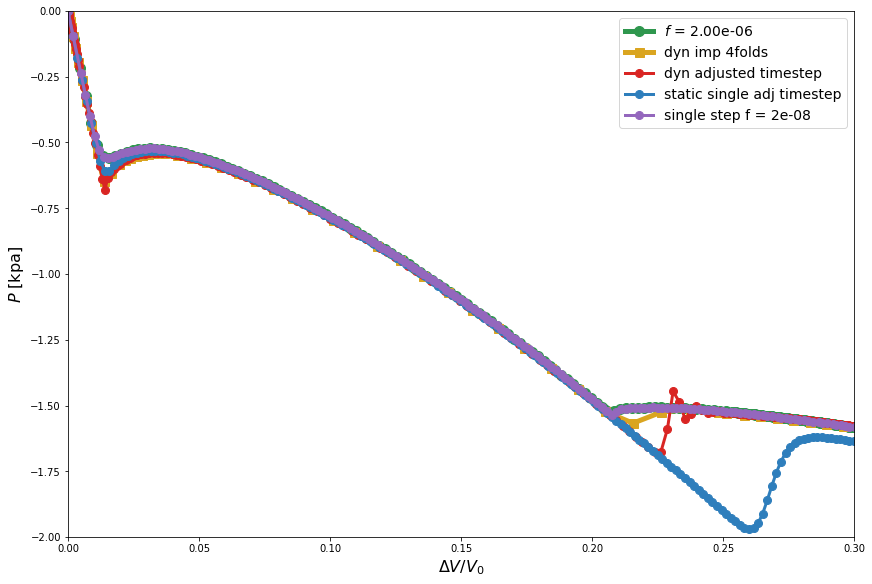

In [4]:
'''test dyn vs static multi vs static single step'''
imper_vals = 5*np.logspace(-4, -2, 3)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (12,8), constrained_layout = True)



cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']

idx_cur = 402
data_path = f'data_out/4fold-test_static-stable-{idx_cur}_pcav_cvol.txt'
stab_fac = 2e-6
data_cur = np.loadtxt(data_path)
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = plt.get_cmap('Greens')(0.7)

ax.plot(vol_norm,pressure_kpa, 'o-', label = rf'$f$ = {stab_fac:.2e}', color = color_plot, linewidth = 5, markersize = 10)
print(f'change in norm vol per step: {(vol_norm[1] - vol_norm[0]):.3e}')


idx_cur = 557
data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3
# print(data_cur[0,0])

ax.plot(vol_norm,pressure_kpa, 's-', label = 'dyn imp 4folds', color = 'goldenrod', linewidth = 5, markersize = 9)
print(f'max \Delta V_norm = {np.max(np.diff(vol_norm)):.3e}')


idx_cur = 218
data_path = f'data_out/4fold-imperfection-{idx_cur}_pcav_cvol.txt'

data_cur = np.loadtxt(data_path)
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = plt.get_cmap('Reds')(0.7)

ax.plot(vol_norm,pressure_kpa, 'o-', label = 'dyn adjusted timestep', color = color_plot, linewidth = 3, markersize = 8)

idx_cur = 225
data_path = f'data_out/4fold-imperfection-{idx_cur}_pcav_cvol.txt'

data_cur = np.loadtxt(data_path)
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = plt.get_cmap('Blues')(0.7)

ax.plot(vol_norm,pressure_kpa, 'o-', label = 'static single adj timestep', color = color_plot, linewidth = 3, markersize = 8)

idx_cur = 228
data_path = f'data_out/4fold-imperfection-{idx_cur}_pcav_cvol.txt'

data_cur = np.loadtxt(data_path)
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = 'tab:orange'

idx_cur = 231
data_path = f'data_out/4fold-imperfection-{idx_cur}_pcav_cvol.txt'

data_cur = np.loadtxt(data_path)
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = 'tab:purple'

ax.plot(vol_norm,pressure_kpa, 'o-', label = f'single step f = {2e-8}', color = color_plot, linewidth = 3, markersize = 8)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('$P$ [kpa]', fontsize = 16)
ax.set_xlim(0,0.3)
ax.set_ylim(-2,0)

# fig.savefig('data_processed/4folds_static_multi_vs_single_vs_dyn.png', facecolor = 'white')

(-2.0, 0.0)

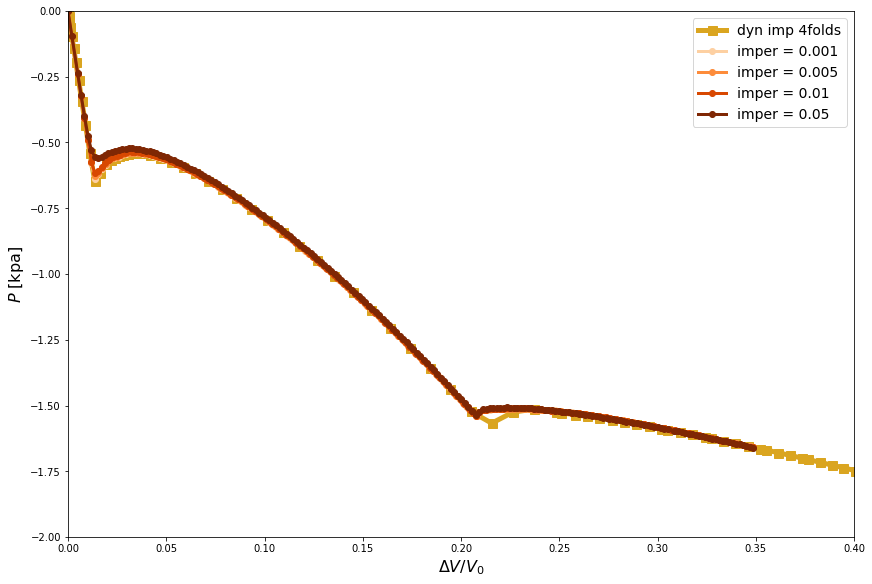

In [15]:
'''imperfection tests for static single step '''
fig, ax = plt.subplots(figsize = (12,8), constrained_layout = True)

idx_cur = 557
data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3
# print(data_cur[0,0])
ax.plot(vol_norm,pressure_kpa, 's-', label = 'dyn imp 4folds', color = 'goldenrod', linewidth = 5, markersize = 9)

##### static tests #####
imperfection_test = [0.001, 0.005, 0.01, 0.05]
initial_idx = 110

for i, imper in enumerate(imperfection_test):
    cvol, pcav = np.loadtxt(f'data_out/imper-test-4fold-v{initial_idx + i}_pcav_cvol.txt', unpack = True)
    
    vol_norm = -(cvol - cvol[0])/cvol[0]
    pressure_kpa = pcav * 1e3

    color_plot = plt.get_cmap('Oranges')((i+1)/len(imperfection_test))
    ax.plot(vol_norm,pressure_kpa, '-o', label = rf'imper = {imper}', color = color_plot, linewidth = 3)

ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('$P$ [kpa]', fontsize = 16)
ax.set_xlim(0,0.4)
ax.set_ylim(-2,0)



(-2.0, 0.0)

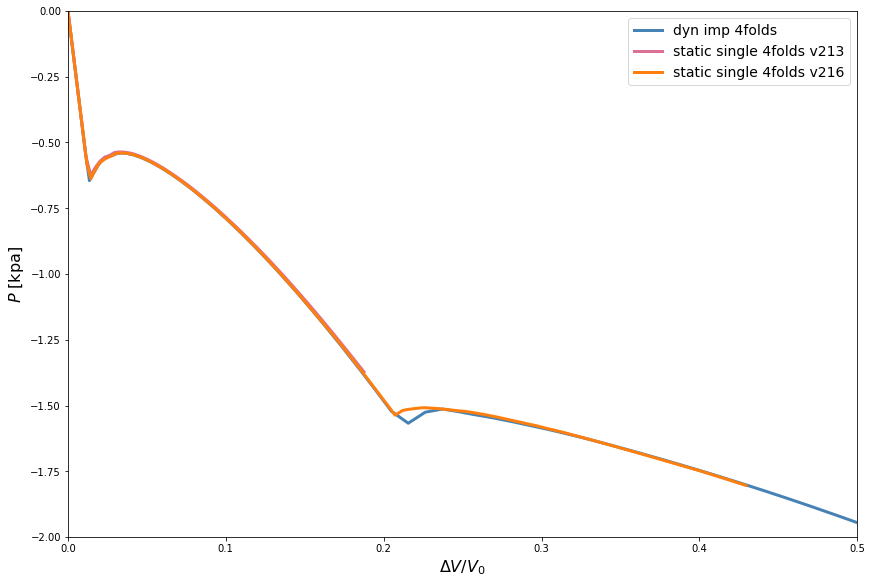

In [19]:
'''plotting static sim long'''
fig, ax = plt.subplots(figsize = (12,8), constrained_layout = True)


idx_cur = 557
data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3
# print(data_cur[0,0])

ax.plot(vol_norm,pressure_kpa, label = 'dyn imp 4folds', color = 'steelblue', linewidth = 3)

idx_cur = 213
cvol, pcav = np.loadtxt(f'data_out/sim-long-4folds-{idx_cur}_pcav_cvol.txt', unpack = True)
vol_norm = -(cvol - cvol[0])/cvol[0]
pressure_kpa = pcav * 1e3

ax.plot(vol_norm,pressure_kpa, label = f'static single 4folds v{idx_cur}', color = 'palevioletred', linewidth = 3)

idx_cur = 216
cvol, pcav = np.loadtxt(f'data_out/sim-long-4folds-{idx_cur}_pcav_cvol.txt', unpack = True)
vol_norm = -(cvol - cvol[0])/cvol[0]
pressure_kpa = pcav * 1e3

ax.plot(vol_norm,pressure_kpa, label = f'static single 4folds v{idx_cur}', color = 'tab:orange', linewidth = 3)

ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('$P$ [kpa]', fontsize = 16)
ax.set_xlim(0,0.5)
ax.set_ylim(-2,0)

(-2.5, 0.0)

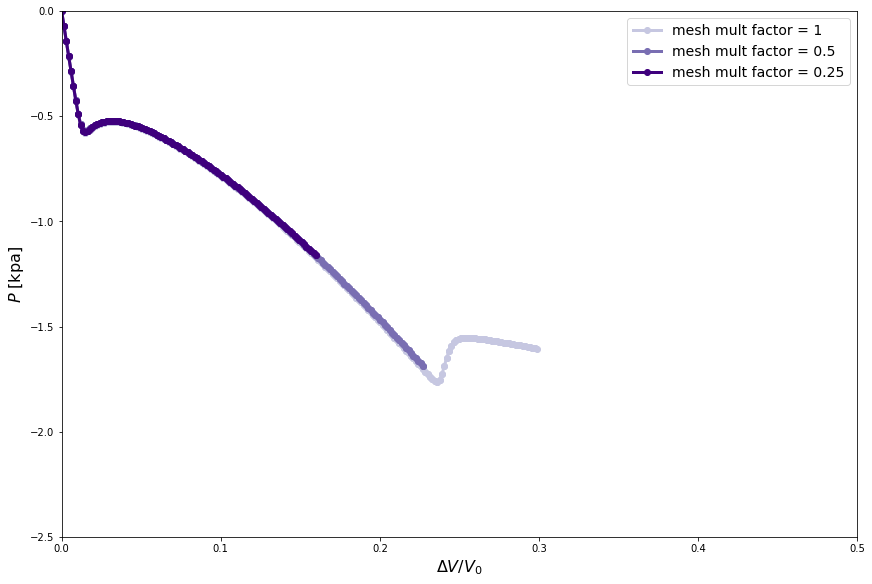

In [79]:
'''mesh sweep results'''

fig, ax = plt.subplots(figsize = (12,8), constrained_layout = True)
# mesh_mult_all = [1, 0.5, 0.25, 0.125]
mesh_mult_all = [1, 0.5, 0.25]

initial_idx = 100
#you see the bump due to the large static stable factor!!!

for i, mesh_mult in enumerate(mesh_mult_all):
    data_path = f'data_out/4fold-test_mesh-{initial_idx + i}_pcav_cvol.txt'
    data_cur = np.loadtxt(data_path)
    
    vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
    pressure_kpa = data_cur[:,1] * 1e3

    color_plot = plt.get_cmap('Purples')((i+1)/len(mesh_mult_all))

    ax.plot(vol_norm,pressure_kpa, '-o', label = rf'mesh mult factor = {mesh_mult}', color = color_plot, linewidth = 3)

ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('$P$ [kpa]', fontsize = 16)
ax.set_xlim(0,0.5)
ax.set_ylim(-2.5,0)

(-2.5, 0.0)

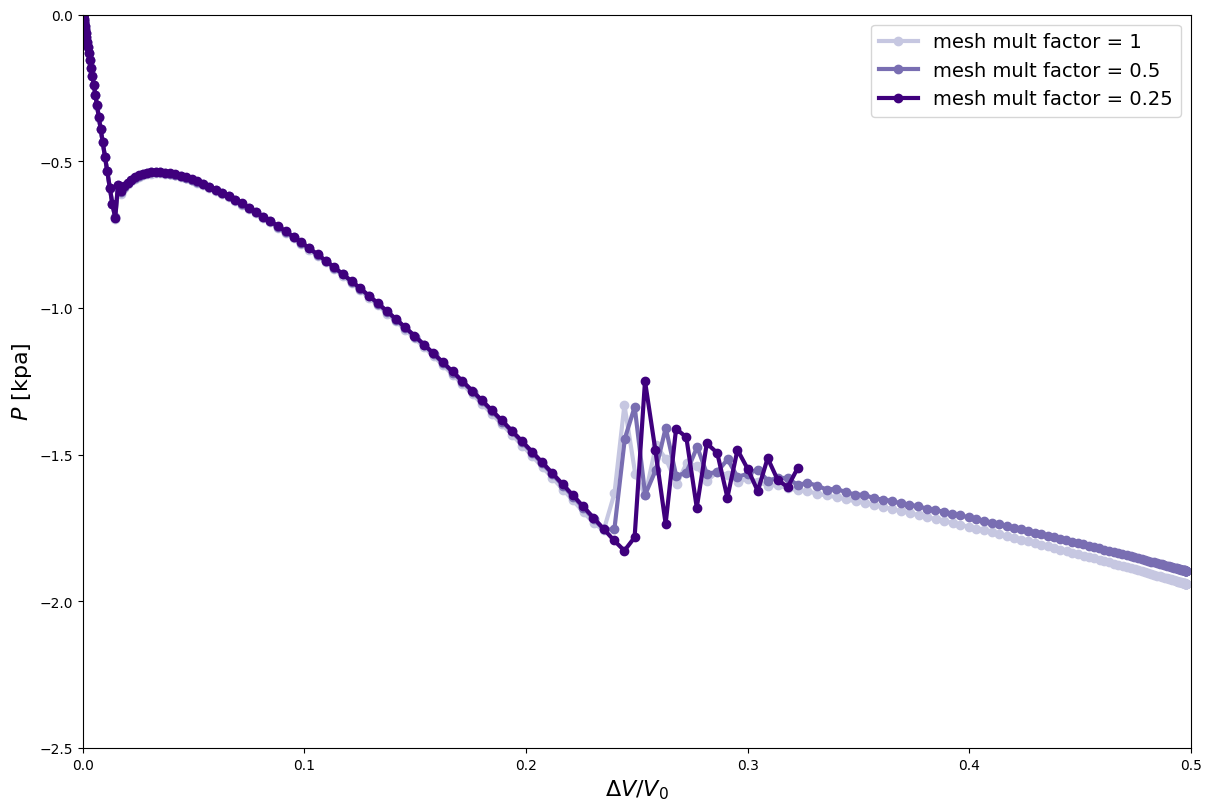

In [8]:
'''mesh sweep results: dyn imp v105+'''

fig, ax = plt.subplots(figsize = (12,8), constrained_layout = True)
# mesh_mult_all = [1, 0.5, 0.25, 0.125]
# mesh_mult_all = [1, 0.5, 0.25]
mesh_mult_all = [1, 0.5, 0.25]

#(note that the 0.25 was manually aborted)
initial_idx = 105


for i, mesh_mult in enumerate(mesh_mult_all):
    data_path = f'data_out/4fold-test_mesh-{initial_idx + i}_pcav_cvol.txt'
    data_cur = np.loadtxt(data_path)
    
    vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
    pressure_kpa = data_cur[:,1] * 1e3

    color_plot = plt.get_cmap('Purples')((i+1)/len(mesh_mult_all))

    ax.plot(vol_norm,pressure_kpa, '-o', label = rf'mesh mult factor = {mesh_mult}', color = color_plot, linewidth = 3)

ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('$P$ [kpa]', fontsize = 16)
ax.set_xlim(0,0.5)
ax.set_ylim(-2.5,0)

(-2.5, 0.0)

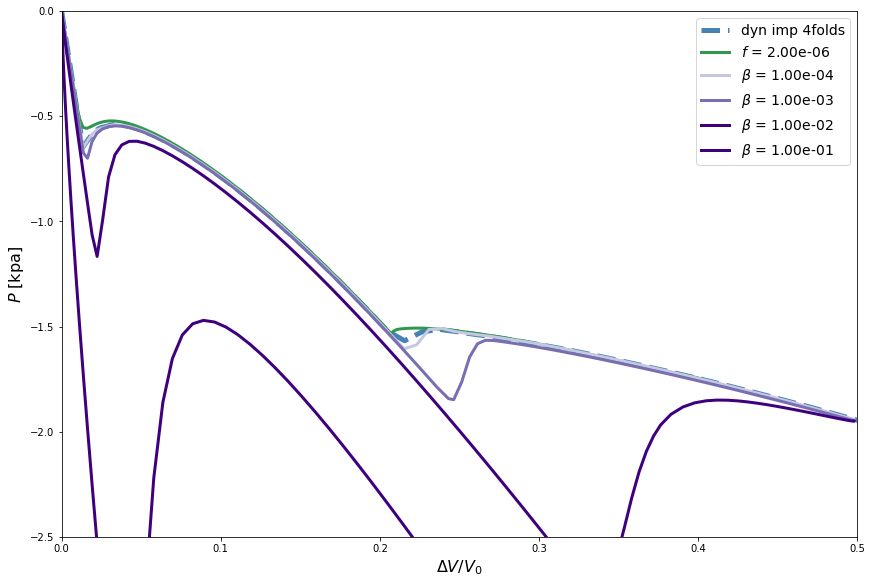

In [36]:
'''sweep over bdamp vals'''
beta_vals = np.logspace(-4, -1, 4)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (12,8), constrained_layout = True)

idx_cur = 557
data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3
# print(data_cur[0,0])

ax.plot(vol_norm,pressure_kpa, '--', label = 'dyn imp 4folds', color = 'steelblue', linewidth = 5)

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']

idx_cur = 402
data_path = f'data_out/4fold-test_static-stable-{idx_cur}_pcav_cvol.txt'
stab_fac = 2e-6
data_cur = np.loadtxt(data_path)
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = plt.get_cmap('Greens')(0.7)

ax.plot(vol_norm,pressure_kpa, label = rf'$f$ = {stab_fac:.2e}', color = color_plot, linewidth = 3)

initial_idx = 130
for i,bdamp in enumerate(beta_vals):
    data_path = f'data_out/4fold-test_damping-{initial_idx + i}_pcav_cvol.txt'
    data_cur = np.loadtxt(data_path)
    
    vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
    pressure_kpa = data_cur[:,1] * 1e3

    color_plot = plt.get_cmap('Purples')((i+1)/len(imper_vals))

    ax.plot(vol_norm,pressure_kpa, label = rf'$\beta$ = {bdamp:.2e}', color = color_plot, linewidth = 3)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('$P$ [kpa]', fontsize = 16)
ax.set_xlim(0,0.5)
ax.set_ylim(-2.5,0)

(-2.5, 0.0)

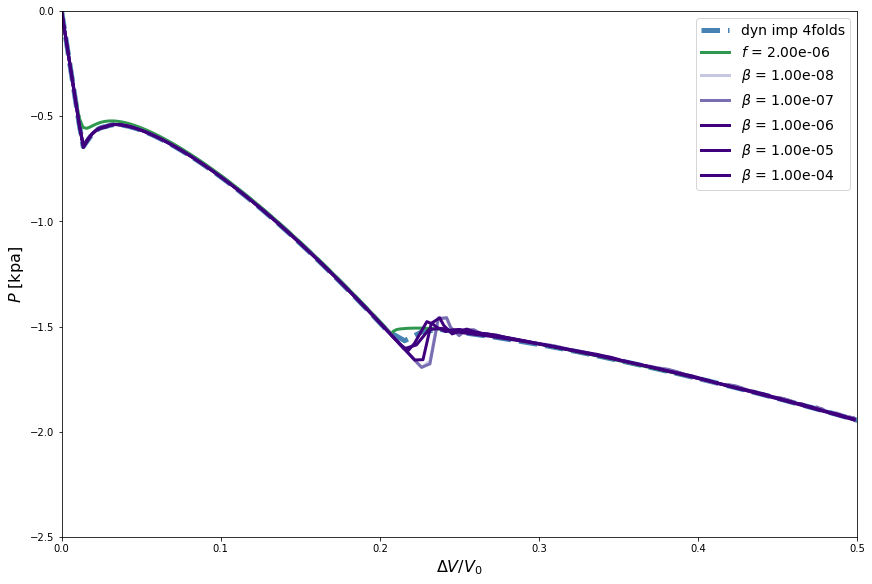

In [40]:
'''sweep over bdamp vals'''
beta_vals = np.logspace(-8, -4, 5)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (12,8), constrained_layout = True)

idx_cur = 557
data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3
# print(data_cur[0,0])

ax.plot(vol_norm,pressure_kpa, '--', label = 'dyn imp 4folds', color = 'steelblue', linewidth = 5)

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']

idx_cur = 402
data_path = f'data_out/4fold-test_static-stable-{idx_cur}_pcav_cvol.txt'
stab_fac = 2e-6
data_cur = np.loadtxt(data_path)
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = plt.get_cmap('Greens')(0.7)

ax.plot(vol_norm,pressure_kpa, label = rf'$f$ = {stab_fac:.2e}', color = color_plot, linewidth = 3)

initial_idx = 140
for i,bdamp in enumerate(beta_vals):
    data_path = f'data_out/4fold-test_damping-{initial_idx + i}_pcav_cvol.txt'
    data_cur = np.loadtxt(data_path)
    
    vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
    pressure_kpa = data_cur[:,1] * 1e3

    color_plot = plt.get_cmap('Purples')((i+1)/len(imper_vals))

    ax.plot(vol_norm,pressure_kpa, label = rf'$\beta$ = {bdamp:.2e}', color = color_plot, linewidth = 3)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('$P$ [kpa]', fontsize = 16)
ax.set_xlim(0,0.5)
ax.set_ylim(-2.5,0)

In [ ]:
'''testing single static step vs dyn imp vs multi buckling'''
fig, ax = plt.subplots(figsize = (12,8), constrained_layout = True)

idx_cur = 557
data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3
# print(data_cur[0,0])

ax.plot(vol_norm,pressure_kpa, '--', label = 'dyn imp 4folds', color = 'steelblue', linewidth = 5)

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']

idx_cur = 402
data_path = f'data_out/4fold-test_static-stable-{idx_cur}_pcav_cvol.txt'
stab_fac = 2e-6
data_cur = np.loadtxt(data_path)
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = plt.get_cmap('Greens')(0.7)

ax.plot(vol_norm,pressure_kpa, label = rf'$f$ = {stab_fac:.2e}', color = color_plot, linewidth = 3)

#todo: plot uhh the thing I'm currently running

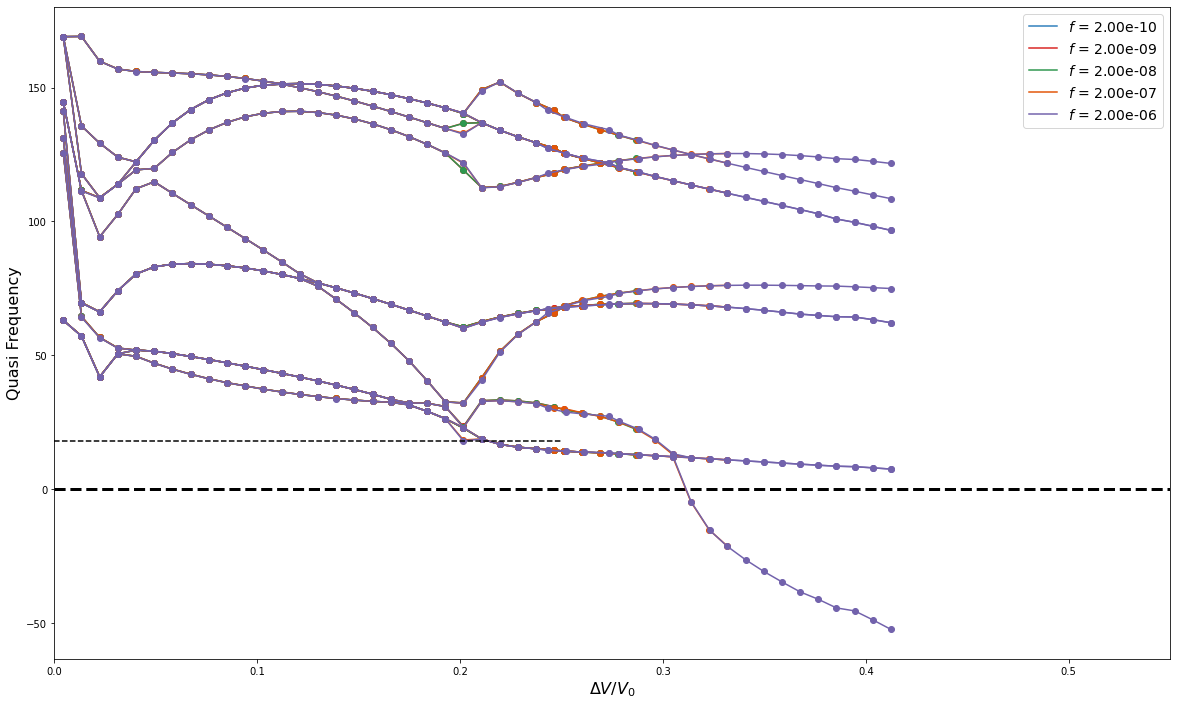

In [15]:
damping_sweep = 2*np.logspace(-10, -6, 5)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 340

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']

ax.hlines(0,0,0.55, 'k', '--', linewidth = 3)

for i,stab_fac in enumerate(damping_sweep):
    if i < 5:
        idx_cur = initial_idx + i
        data_path = f'data_out/4fold-test_static-stable-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            freq_rescale = np.sign(freq_all[:,j]) * np.sqrt(np.abs(freq_all[:,j])) * 1/(2*np.pi)
            ax.plot(-3*temp_all, freq_rescale, 'o', color = color_plot)
            if j == 0:
                # if stab_fac == 2e-6:
                #     print(freq_rescale)
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot, label = rf'$f$ = {stab_fac:.2e}')
            else:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Quasi Frequency', fontsize = 16)
ax.set_xlim(0,0.55)

ax.hlines(18, 0, 0.25, 'k', '--')

fig.savefig('data_processed/static_stable_4folds.jpg')


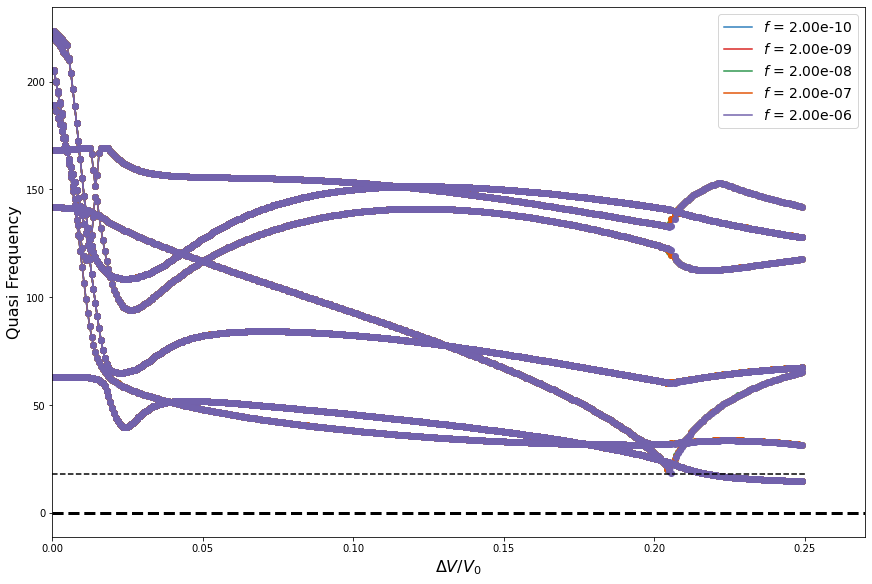

In [12]:
damping_sweep = 2*np.logspace(-10, -6, 5)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (12,8), constrained_layout = True)

initial_idx = 390

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']

ax.hlines(0,0,0.55, 'k', '--', linewidth = 3)

for i,stab_fac in enumerate(damping_sweep):
    if i < 5:
        idx_cur = initial_idx + i
        data_path = f'data_out/4fold-test_static-stable-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            freq_rescale = np.sign(freq_all[:,j]) * np.sqrt(np.abs(freq_all[:,j])) * 1/(2*np.pi)
            ax.plot(-3*temp_all, freq_rescale, 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot, label = rf'$f$ = {stab_fac:.2e}')
            else:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Quasi Frequency', fontsize = 16)
ax.set_xlim(0,0.27)

ax.hlines(18, 0, 0.25, 'k', '--')
# ax.set_xlim(0,0.1)
# ax.set_ylim(120, 160)


fig.savefig('data_processed/static_stable_4folds.png', facecolor = 'white')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


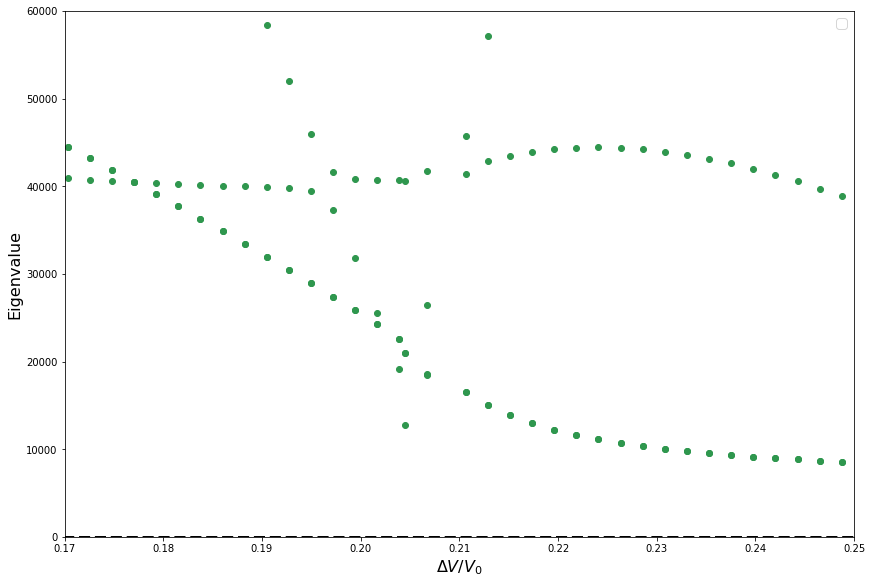

In [80]:
damping_sweep = 2*np.logspace(-8, -4, 5)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (12,8), constrained_layout = True)

initial_idx = 400

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']

ax.hlines(0,0,0.55, 'k', '--', linewidth = 3)

for i,stab_fac in enumerate(damping_sweep):
    if i == 2:
        idx_cur = initial_idx + i
        data_path = f'data_out/4fold-test_static-stable-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            # freq_rescale = np.sign(freq_all[:,j]) * np.sqrt(np.abs(freq_all[:,j])) * 1/(2*np.pi)
            freq_rescale = freq_all[:,j]
            ax.plot(-3*temp_all, freq_rescale, 'o', color = color_plot)
            # if j == 0:
            #     ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot, label = rf'$f$ = {stab_fac:.2e}')
            # else:
            #     ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Eigenvalue', fontsize = 16)
ax.set_xlim(0,0.5)
ax.set_xlim(0.17,0.25)
ax.set_ylim(0,60e3)
# ax.set_ylim(0,80)


fig.savefig('data_processed/static_stable_4folds.png', facecolor = 'white')

[  89554.921875    89564.3828125  149354.96875    169796.265625
  169802.734375   436178.8125     474713.125      474726.96875
  707562.375     1093381.625    ]


200

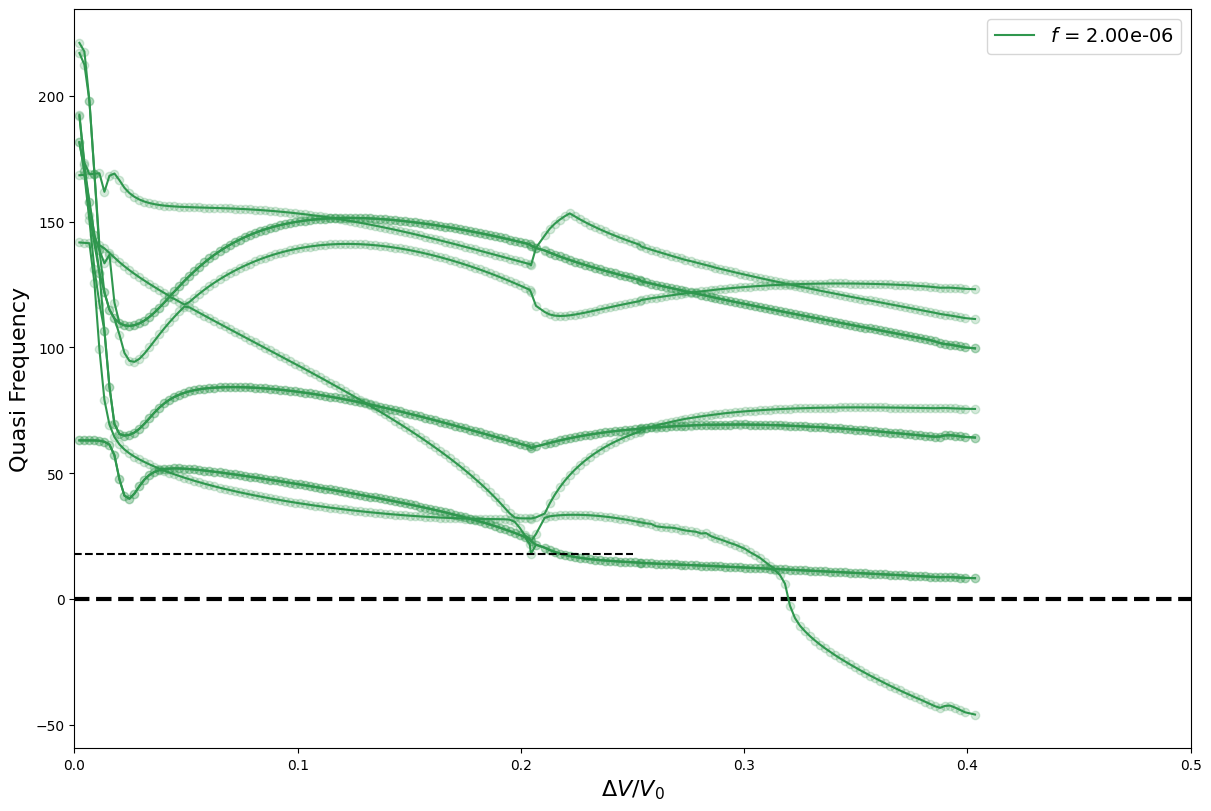

In [5]:
'''plot freq 400s [contains 402 used one]'''
damping_sweep = 2*np.logspace(-8, -4, 5)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (12,8), constrained_layout = True)

initial_idx = 400

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']

ax.hlines(0,0,0.55, 'k', '--', linewidth = 3)

for i,stab_fac in enumerate(damping_sweep):
    if i == 2:
        idx_cur = initial_idx + i
        data_path = f'data_out/4fold-test_static-stable-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            freq_rescale = np.sign(freq_all[:,j]) * np.sqrt(np.abs(freq_all[:,j])) * 1/(2*np.pi)
            ax.plot(-3*temp_all, freq_rescale, 'o', color = color_plot, alpha = 0.2)
            if j == 0:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot, label = rf'$f$ = {stab_fac:.2e}')
            else:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Quasi Frequency', fontsize = 16)
ax.set_xlim(0,0.5)
# ax.set_xlim(0.15,0.25)
# ax.set_ylim(0,80)
ax.hlines(18, 0, 0.25, 'k', '--')

fig.savefig('data_processed/static_stable_4folds.png', facecolor = 'white')
print(freq_all[8,:])
len(freq_rescale)

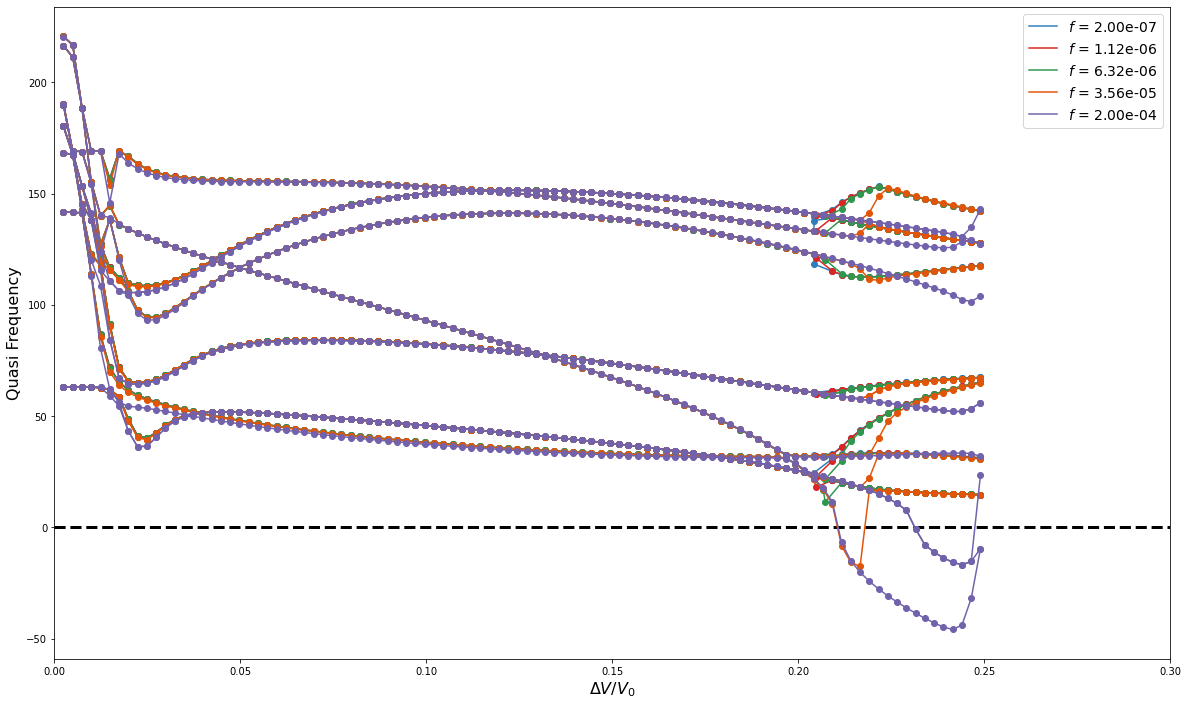

In [33]:
damping_sweep = 2*np.logspace(-7, -4, 5)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 380

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']

ax.hlines(0,0,0.55, 'k', '--', linewidth = 3)

for i,stab_fac in enumerate(damping_sweep):
    if i < 5:
        idx_cur = initial_idx + i
        data_path = f'data_out/4fold-test_static-stable-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            freq_rescale = np.sign(freq_all[:,j]) * np.sqrt(np.abs(freq_all[:,j])) * 1/(2*np.pi)
            ax.plot(-3*temp_all, freq_rescale, 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot, label = rf'$f$ = {stab_fac:.2e}')
            else:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Quasi Frequency', fontsize = 16)
ax.set_xlim(0,0.3)


fig.savefig('data_processed/static_stable_4folds.jpg')


(-2.5, 0.0)

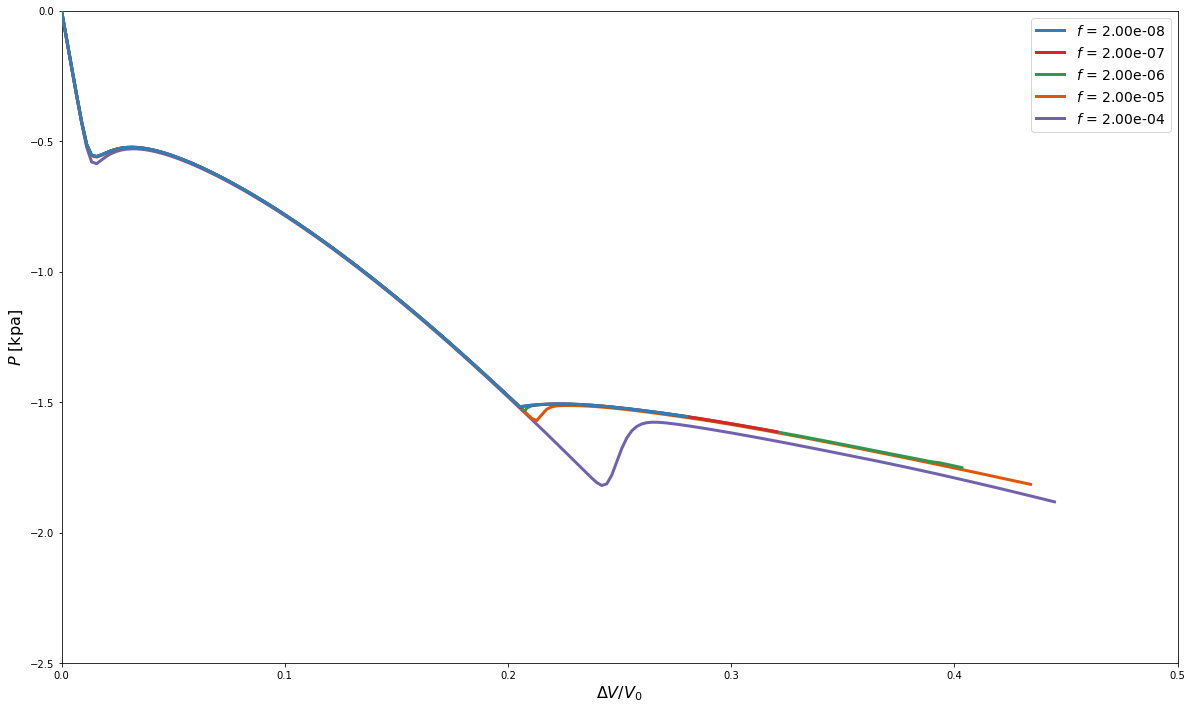

In [12]:
# damping_sweep = 2*np.logspace(-10, -6, 5)
damping_sweep = 2*np.logspace(-8, -4, 5)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 400

# idx_cur = 557
# data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
# vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
# pressure_kpa = data_cur[:,1] * 1e3
# print(data_cur[0,0])

# ax.plot(vol_norm,pressure_kpa, '--', label = 'dyn imp 4folds', color = 'steelblue', linewidth = 5)

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']


for i,stab_fac in enumerate(damping_sweep):
    zorder = 5*(len(damping_sweep) - i)
    if i >= 0:
        idx_cur = initial_idx + i
        data_path = f'data_out/4fold-test_static-stable-{idx_cur}_pcav_cvol.txt'
        data_cur = np.loadtxt(data_path)
        
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3
        # print(pressure_kpa)

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        ax.plot(vol_norm,pressure_kpa, label = rf'$f$ = {stab_fac:.2e}', color = color_plot, linewidth = 3, zorder = zorder)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('$P$ [kpa]', fontsize = 16)
ax.set_xlim(0,0.5)
ax.set_ylim(-2.5,0)

old nonsense below

(-3.0, 0.01)

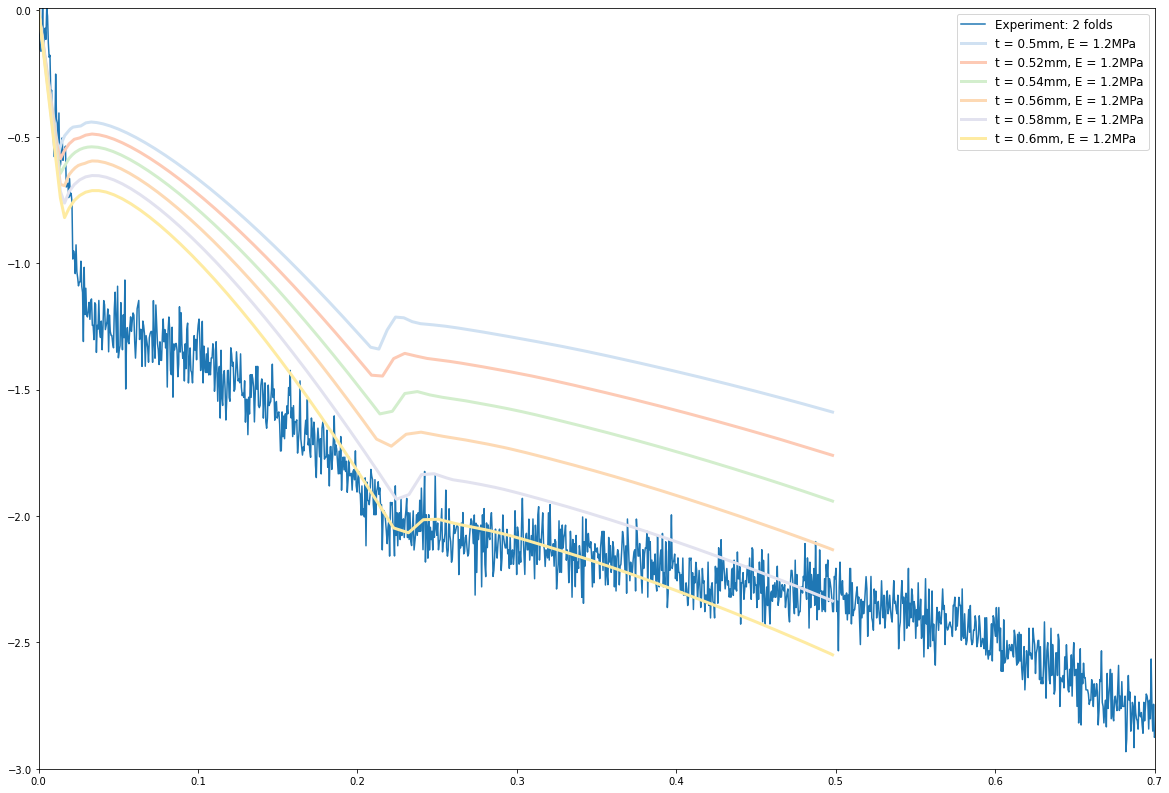

In [7]:
E_try = [1.1, 1.2, 1.3, 1.4]
t_try = [0.50, 0.52, 0.54, 0.56, 0.58, 0.6]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,14))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])

initial_idx = 500


ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 2 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        if E == 1.2:
            idx_cur = initial_idx + len(t_try)*j + i
            data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
            vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
            pressure_kpa = data_cur[:,1] * 1e3

            color_plot = plt.get_cmap(cmap_all[i])(j/(len(t_try) - 1))
            ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = color_plot,
                linewidth = 3)

ax.legend(loc = 'best', fontsize = 12)
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -3)

(-4.5, 0.01)

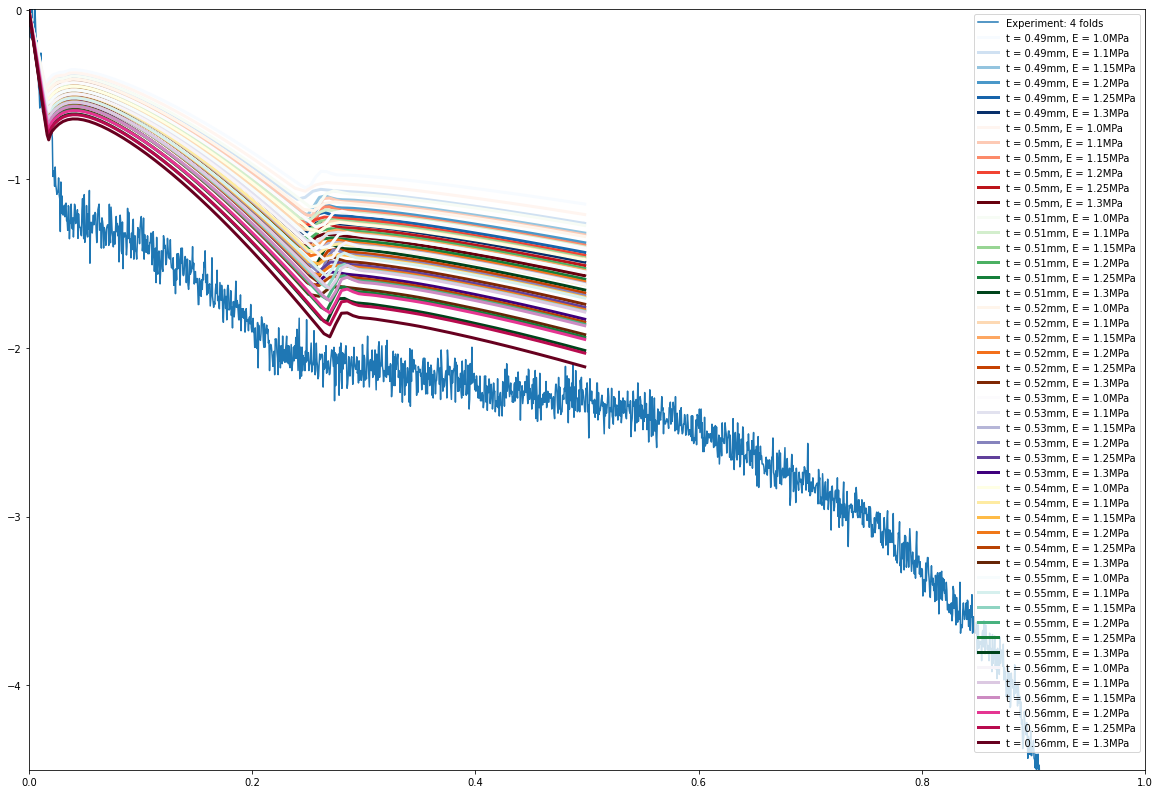

In [3]:
E_try = [1.0, 1.1, 1.15, 1.2, 1.25, 1.3]
t_try = [0.49, 0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,14))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])
# ax.plot(-(vol_v113 - vol_v113[0])/vol_v113[0], pressure_v113, label = 'Dynamic Implicit: 4 folds') #v113
# ax.set_xlim(left = 0, right = 1.)
initial_idx = 100


ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 4 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        idx_cur = initial_idx + len(t_try)*j + i
        data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])(j/(len(E_try) - 1))
        # print(j/(len(E_try) - 1))
        ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = color_plot,
            linewidth = 3)

ax.legend(loc = 'best');
ax.set_xlim(left = 0, right = 1)
ax.set_ylim(top = 0.01, bottom = -4.5)

(-3.0, 0.01)

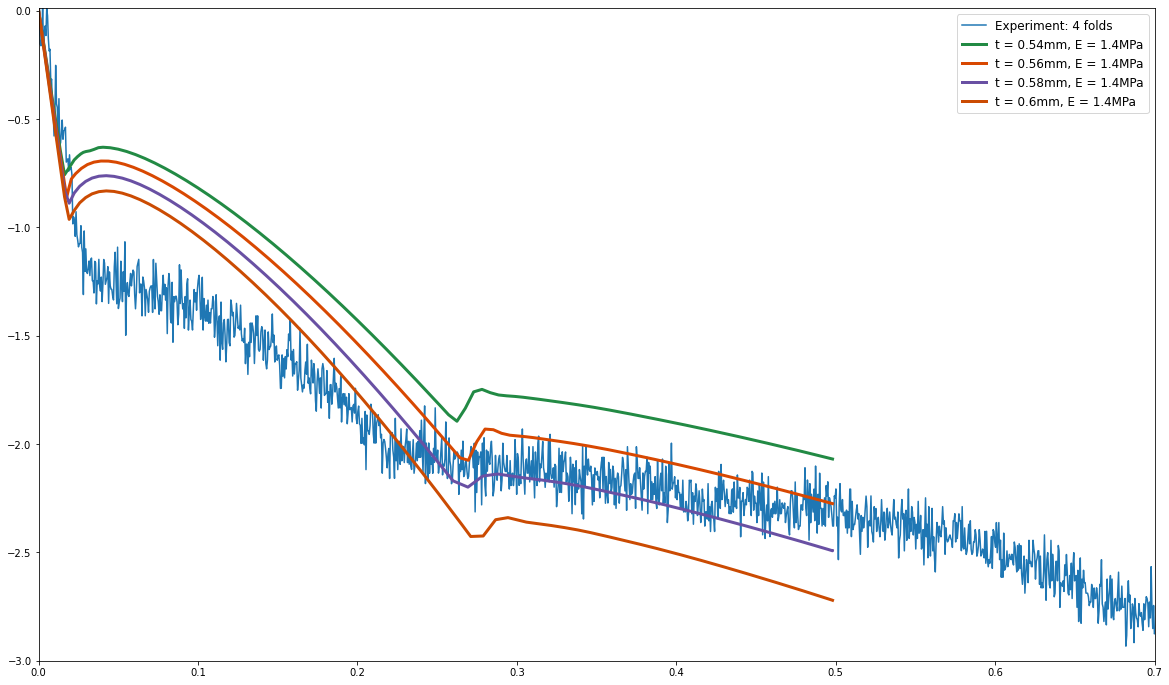

In [4]:
E_try = [1.1, 1.2, 1.3, 1.4, 1.5]
t_try = [0.50, 0.52, 0.54, 0.56, 0.58, 0.6]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])
# ax.plot(-(vol_v113 - vol_v113[0])/vol_v113[0], pressure_v113, label = 'Dynamic Implicit: 4 folds') #v113
# ax.set_xlim(left = 0, right = 1.)
initial_idx = 200


ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 4 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        if t > 0.53 and E == 1.4:
            idx_cur = initial_idx + len(t_try)*j + i
            data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
            vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
            pressure_kpa = data_cur[:,1] * 1e3

            color_plot = plt.get_cmap(cmap_all[i])(j/(len(E_try) - 1))
            # print(j/(len(E_try) - 1))
            ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = color_plot,
                linewidth = 3)

ax.legend(loc = 'best', fontsize = 12)
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -3)

(-3.0, 0.01)

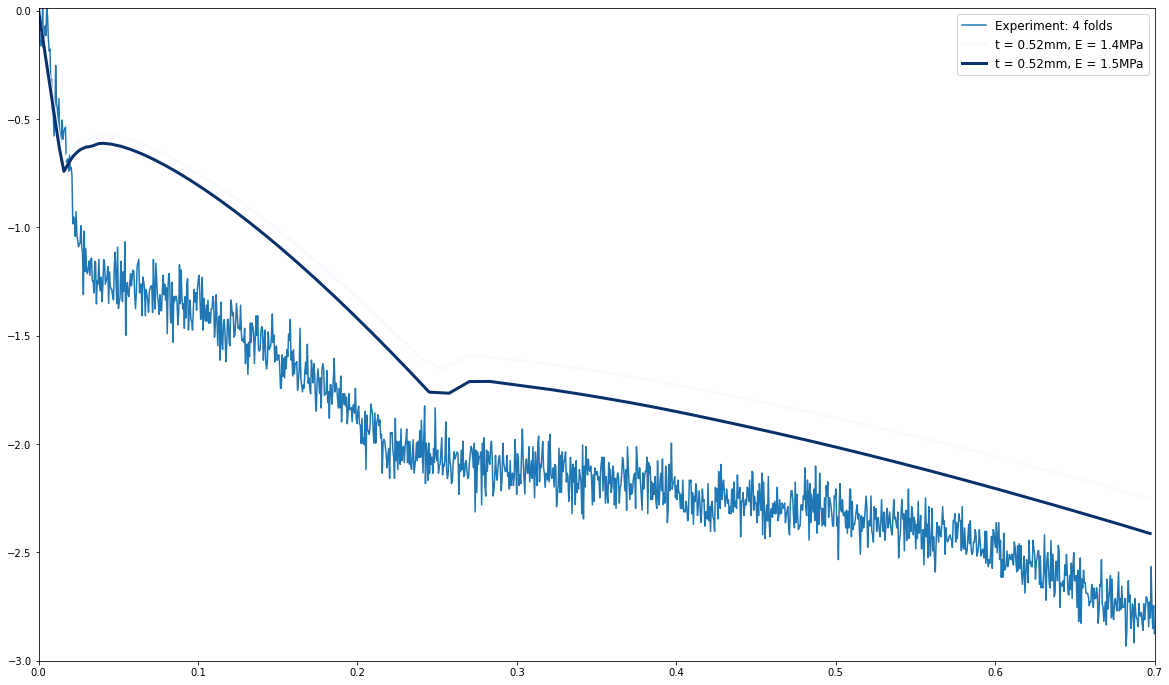

In [5]:
E_try = [1.4, 1.5]
t_try = [0.52]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])
# ax.plot(-(vol_v113 - vol_v113[0])/vol_v113[0], pressure_v113, label = 'Dynamic Implicit: 4 folds') #v113
# ax.set_xlim(left = 0, right = 1.)
initial_idx = 300


ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 4 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        try:
            idx_cur = initial_idx + len(t_try)*j + i
            data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
            vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
            pressure_kpa = data_cur[:,1] * 1e3

            color_plot = plt.get_cmap(cmap_all[i])(j/(len(E_try) - 1))
            # print(j/(len(E_try) - 1))
            ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = color_plot,
                linewidth = 3)
        except: pass

ax.legend(loc = 'best', fontsize = 12)
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -3)

(-3.0, 0.01)

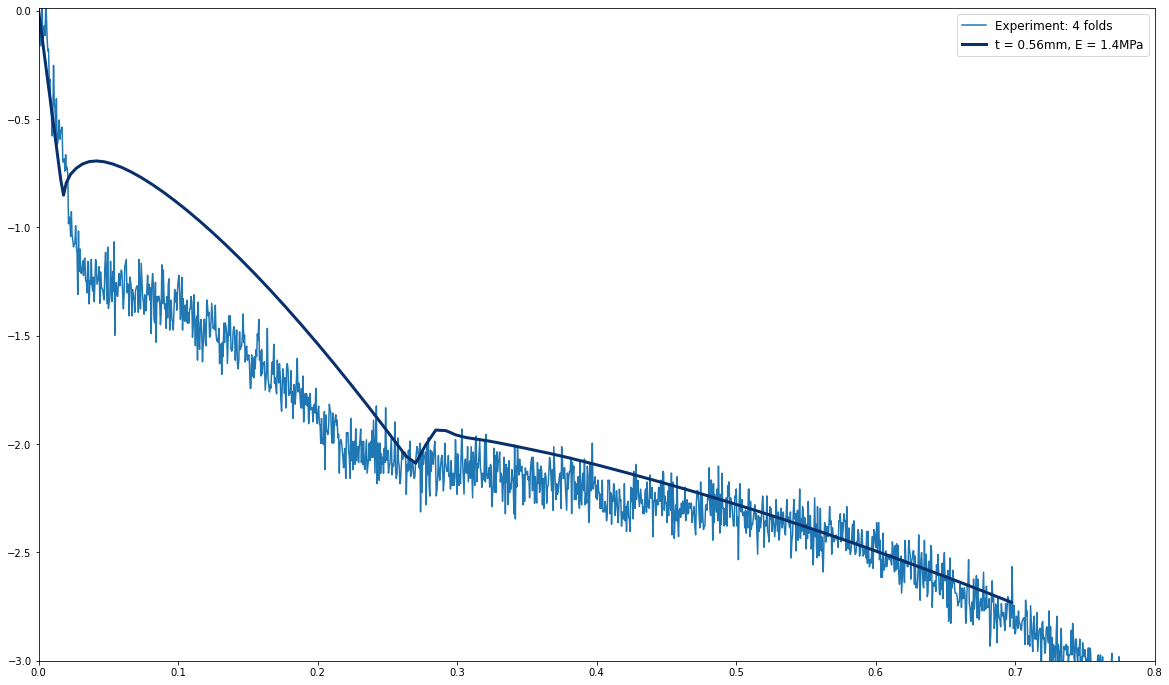

In [6]:
E_try = [1.4]
t_try = [0.56]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])
# ax.plot(-(vol_v113 - vol_v113[0])/vol_v113[0], pressure_v113, label = 'Dynamic Implicit: 4 folds') #v113
# ax.set_xlim(left = 0, right = 1.)
initial_idx = 400


ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 4 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        idx_cur = initial_idx + len(t_try)*j + i
        data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])((j+1)/(len(E_try)))
        # print(j/(len(E_try) - 1))
        ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = color_plot,
            linewidth = 3)

ax.legend(loc = 'best', fontsize = 12)
ax.set_xlim(left = 0, right = 0.8)
ax.set_ylim(top = 0.01, bottom = -3)

(-3.0, 0.01)

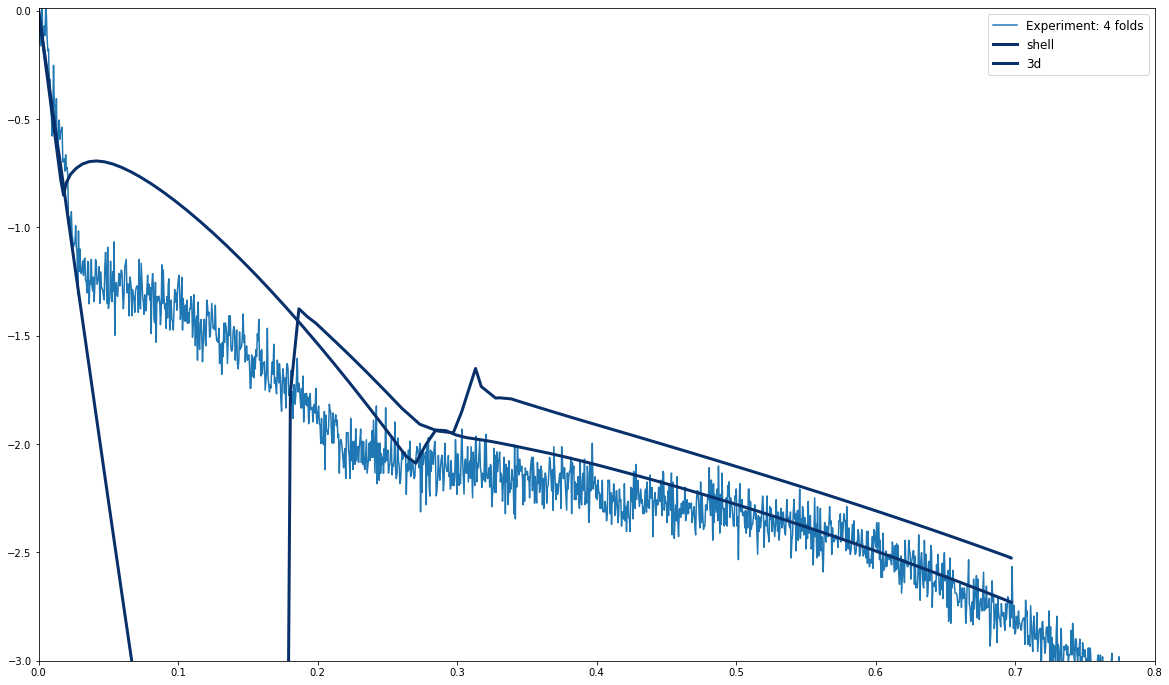

In [16]:
E_try = [1.4]
t_try = [0.56]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])
# ax.plot(-(vol_v113 - vol_v113[0])/vol_v113[0], pressure_v113, label = 'Dynamic Implicit: 4 folds') #v113
# ax.set_xlim(left = 0, right = 1.)
initial_idx = 400


ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 4 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        idx_cur = initial_idx + len(t_try)*j + i
        data_cur = np.loadtxt(f'data_out/4fold-fitting-{idx_cur}_pcav_cvol.txt')
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])((j+1)/(len(E_try)))
        # print(j/(len(E_try) - 1))
        ax.plot(vol_norm,pressure_kpa, label = f'shell', color = color_plot,
            linewidth = 3)

idx_cur = 100
data_cur = np.loadtxt(f'data_out/4fold-test_3d-v{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = plt.get_cmap(cmap_all[i])((j+1)/(len(E_try)))
# print(j/(len(E_try) - 1))
ax.plot(vol_norm,pressure_kpa, label = f'3d', color = color_plot,
    linewidth = 3)

ax.legend(loc = 'best', fontsize = 12)
ax.set_xlim(left = 0, right = 0.8)
ax.set_ylim(top = 0.01, bottom = -3)

(0.1791464821222607, 0.49287197231833907, 0.7354248366013072, 1.0)
(0.8503344867358708, 0.14686658977316416, 0.13633217993079583, 1.0)
(0.18246828143021915, 0.5933256439830834, 0.3067589388696655, 1.0)
(0.8871510957324106, 0.3320876585928489, 0.03104959630911188, 1.0)
(0.4488427527873895, 0.3839600153787005, 0.6738792772010764, 1.0)
(0.8482276047673972, 0.3522952710495963, 0.03497116493656286, 1.0)


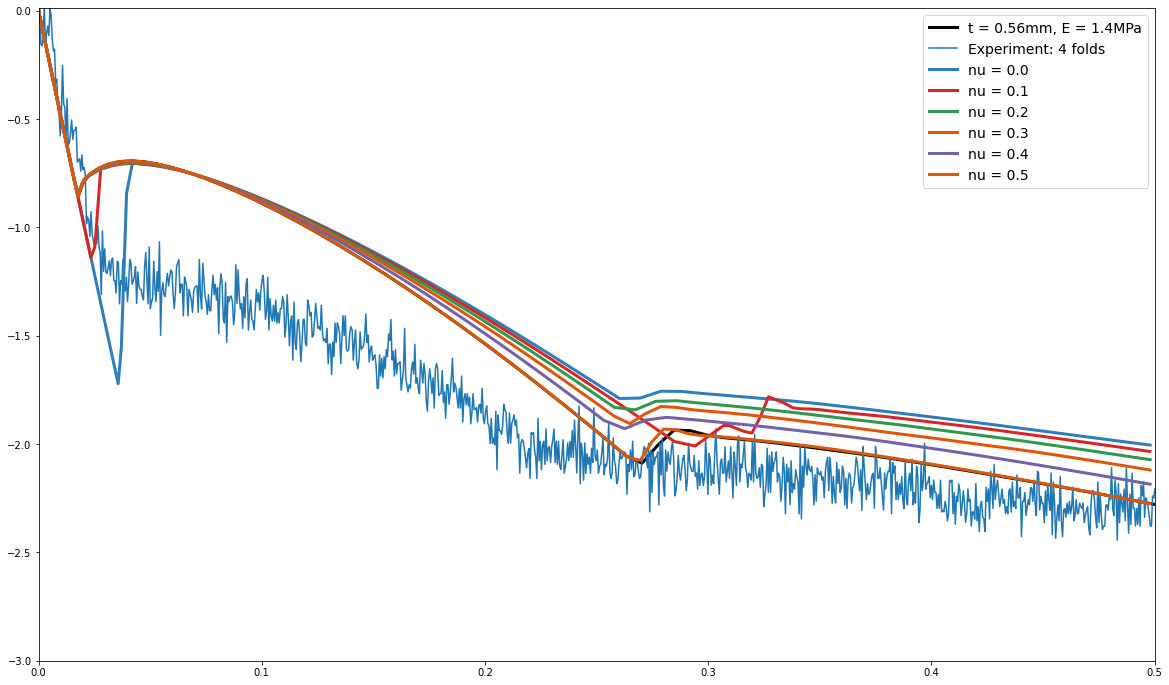

In [7]:
nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])
# ax.plot(-(vol_v113 - vol_v113[0])/vol_v113[0], pressure_v113, label = 'Dynamic Implicit: 4 folds') #v113
# ax.set_xlim(left = 0, right = 1.)
initial_idx = 100

data_cur = np.loadtxt(f'data_out/4fold-fitting-400_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

# print(j/(len(E_try) - 1))
ax.plot(vol_norm,pressure_kpa, label = f't = {0.56}mm, E = {1.4}MPa', color = 'k',linewidth = 3)


ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 4 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,nu in enumerate(nu_try):
    try:
        idx_cur = initial_idx + i
        data_path = f'data_out/4fold-test_nu-{idx_cur}_pcav_cvol.txt'
        data_cur = np.loadtxt(data_path)
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])(0.7)
        print(color_plot)
        ax.plot(vol_norm,pressure_kpa, label = f'nu = {nu}', color = color_plot,
            linewidth = 3)
    except: pass


ax.legend(loc = 'best', fontsize = 14)
ax.set_xlim(left = 0, right = 0.5)
ax.set_ylim(top = 0.01, bottom = -3)


fig.savefig('data_processed/change_nu_4folds.png')

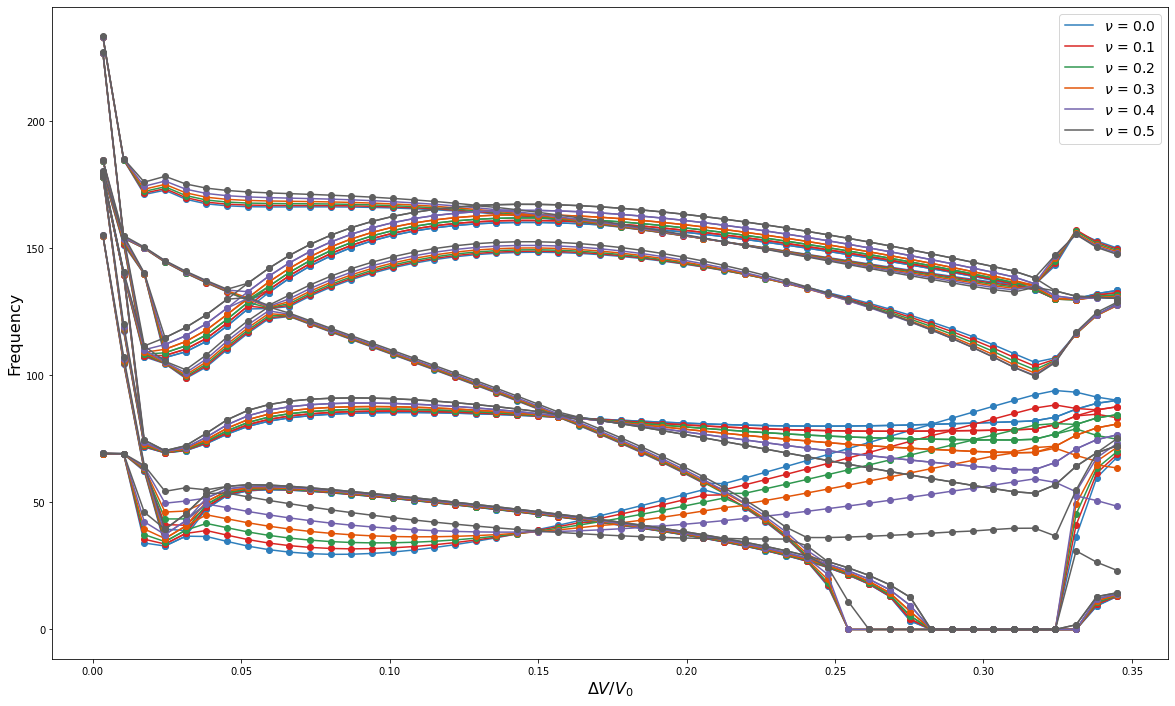

In [6]:
nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 260

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

for i,nu in enumerate(nu_try):
    if nu >= 0.0:
        idx_cur = initial_idx + i
        data_path = f'data_out/4fold-test_nu-{idx_cur}_eig_freq.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            ax.plot(-3*temp_all, freq_all[:,j], 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, label = rf'$\nu$ = {nu}')
            else:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Frequency', fontsize = 16)


fig.savefig('data_processed/change_nu_4folds_freq.jpg')


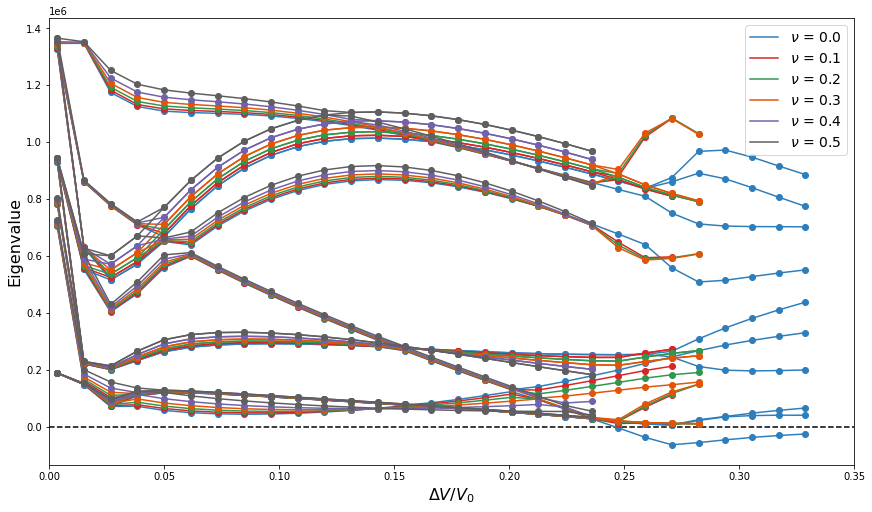

In [28]:
nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (12,7), constrained_layout = True)

initial_idx = 240

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

ax.hlines(0,0,0.35, 'k', '--')

for i,nu in enumerate(nu_try):
    if nu >= 0.0:
        idx_cur = initial_idx + i
        data_path = f'data_out/4fold-test_nu-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            ax.plot(-3*temp_all, freq_all[:,j], 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, label = rf'$\nu$ = {nu}')
            else:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Eigenvalue', fontsize = 16)
ax.set_xlim(0,0.35)


fig.savefig('data_processed/change_nu_4folds_val.jpg')


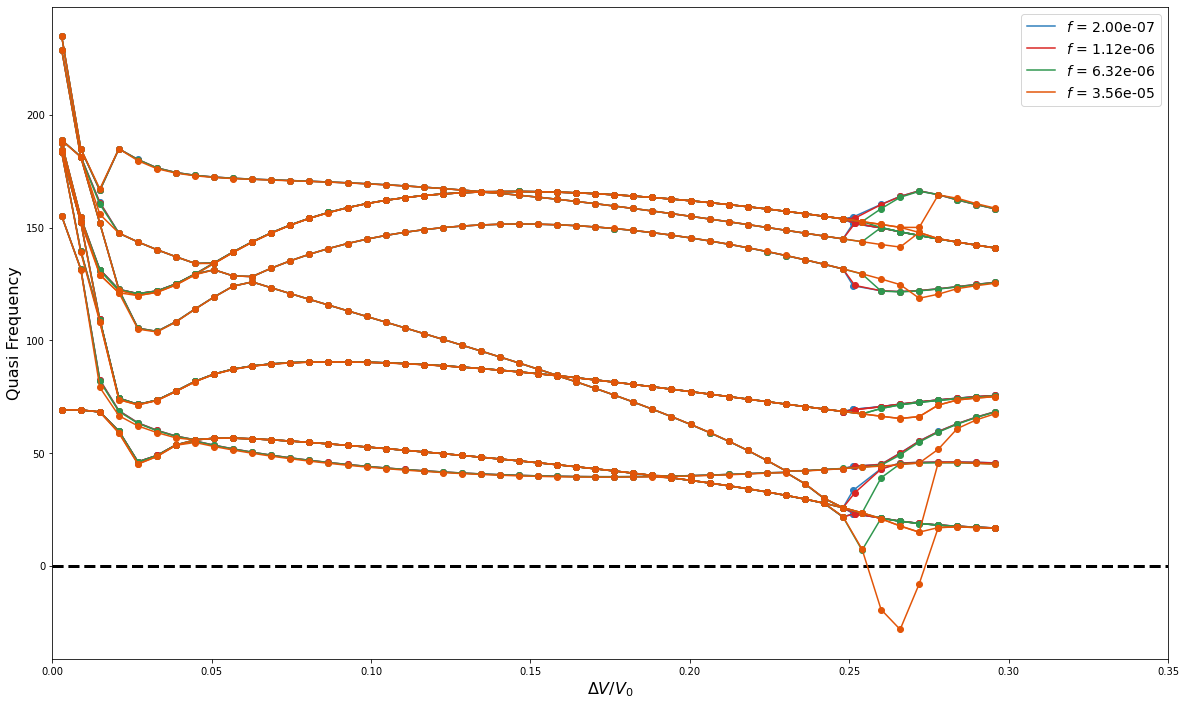

In [14]:
damping_sweep = 2*np.logspace(-7, -4, 5)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 320

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']

ax.hlines(0,0,0.55, 'k', '--', linewidth = 3)

for i,stab_fac in enumerate(damping_sweep):
    if i < 4:
        idx_cur = initial_idx + i
        data_path = f'data_out/4fold-test_static-stable-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            freq_rescale = np.sign(freq_all[:,j]) * np.sqrt(np.abs(freq_all[:,j])) * 1/(2*np.pi)
            ax.plot(-3*temp_all, freq_rescale, 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot, label = rf'$f$ = {stab_fac:.2e}')
            else:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Quasi Frequency', fontsize = 16)
ax.set_xlim(0,0.35)


fig.savefig('data_processed/static_stable_4folds.jpg')


(0.1791464821222607, 0.49287197231833907, 0.7354248366013072, 1.0)
(0.8503344867358708, 0.14686658977316416, 0.13633217993079583, 1.0)
(0.18246828143021915, 0.5933256439830834, 0.3067589388696655, 1.0)


(-1.5, -1.2)

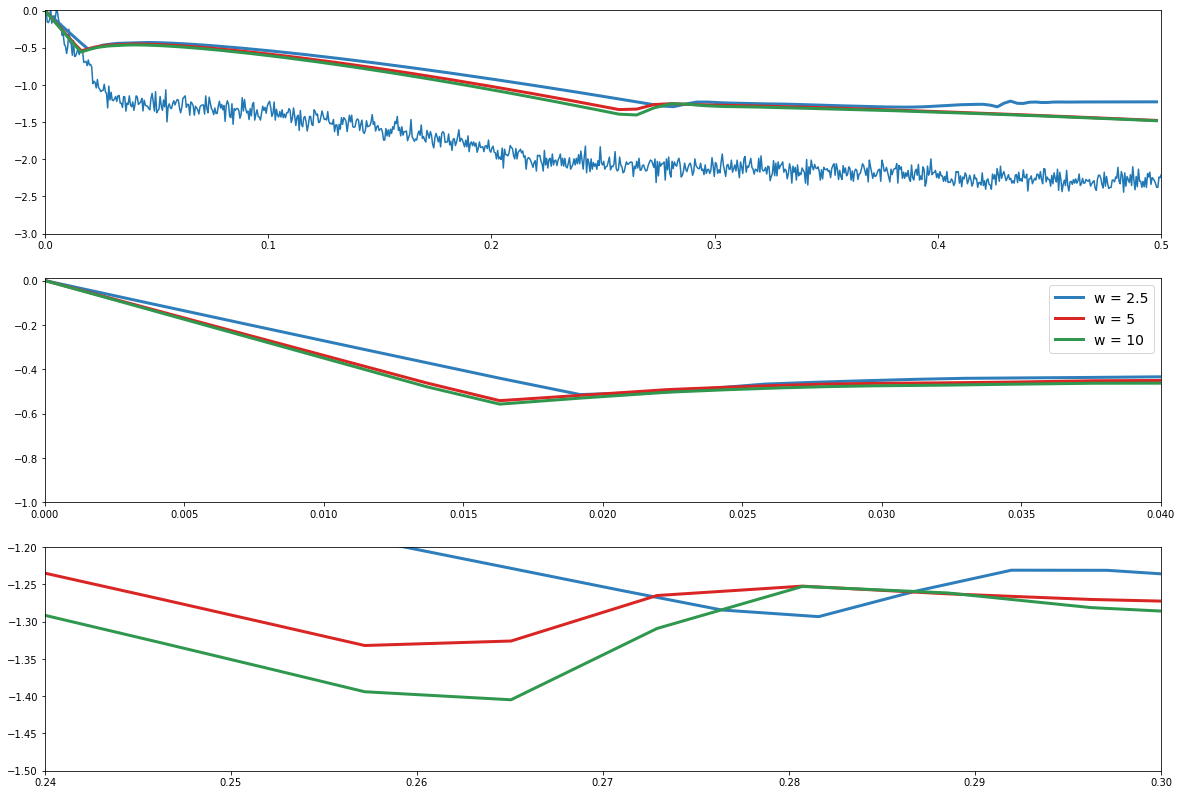

In [64]:
w_try = [2.5, 5, 10]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(3,1,figsize = (20,14))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])
# ax.plot(-(vol_v113 - vol_v113[0])/vol_v113[0], pressure_v113, label = 'Dynamic Implicit: 4 folds') #v113
# ax.set_xlim(left = 0, right = 1.)
initial_idx = 100


ax[0].plot(vol_all/vol_0, pressure_all, label = 'Experiment: 4 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,w in enumerate(w_try):
    idx_cur = initial_idx + i
    data_path = f'data_out/4fold-test_w-{idx_cur}_pcav_cvol.txt'
    data_cur = np.loadtxt(data_path)
    vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
    pressure_kpa = data_cur[:,1] * 1e3

    color_plot = plt.get_cmap(cmap_all[i])(0.7)
    print(color_plot)
    for j in range(3):
        ax[j].plot(vol_norm,pressure_kpa, label = f'w = {w}', color = color_plot,
            linewidth = 3)


ax[1].legend(loc = 'best', fontsize = 14)
ax[0].set_xlim(left = 0, right = 0.5)
ax[0].set_ylim(top = 0.01, bottom = -3)

ax[1].set_xlim(left = 0, right = 0.04)
ax[1].set_ylim(top = 0.01, bottom = -1)

ax[2].set_xlim(left = 0.24, right = 0.3)
ax[2].set_ylim(top = -1.2, bottom = -1.5)

# fig.savefig('data_processed/imper_4folds.png')

(0.1791464821222607, 0.49287197231833907, 0.7354248366013072, 1.0)
(0.8503344867358708, 0.14686658977316416, 0.13633217993079583, 1.0)
(0.18246828143021915, 0.5933256439830834, 0.3067589388696655, 1.0)
(0.8871510957324106, 0.3320876585928489, 0.03104959630911188, 1.0)
(0.4488427527873895, 0.3839600153787005, 0.6738792772010764, 1.0)


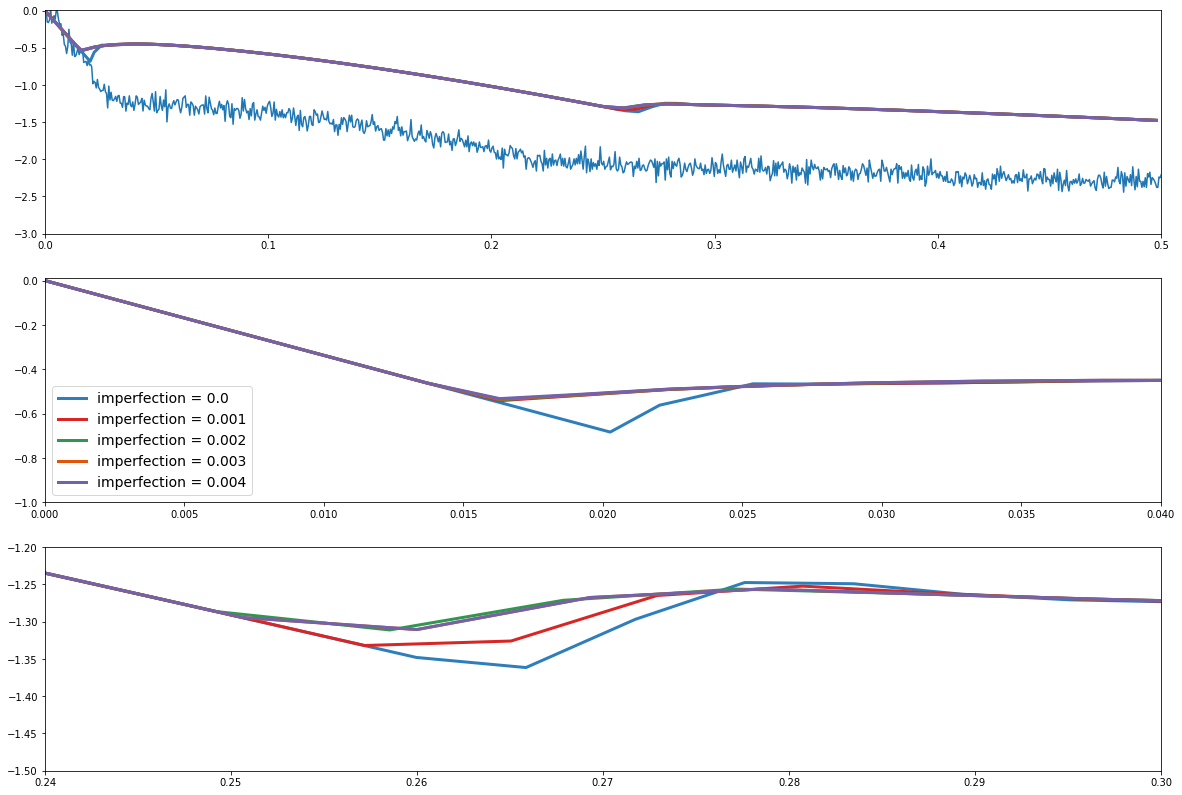

In [55]:
imperfection_test = [0.0, 0.001, 0.002, 0.003, 0.004]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(3,1,figsize = (20,14))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])
# ax.plot(-(vol_v113 - vol_v113[0])/vol_v113[0], pressure_v113, label = 'Dynamic Implicit: 4 folds') #v113
# ax.set_xlim(left = 0, right = 1.)
initial_idx = 100


ax[0].plot(vol_all/vol_0, pressure_all, label = 'Experiment: 4 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,imper in enumerate(imperfection_test):
    idx_cur = initial_idx + i
    data_path = f'data_out/imper-test-4fold-v{idx_cur}_pcav_cvol.txt'
    data_cur = np.loadtxt(data_path)
    vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
    pressure_kpa = data_cur[:,1] * 1e3

    color_plot = plt.get_cmap(cmap_all[i])(0.7)
    print(color_plot)
    for j in range(3):
        ax[j].plot(vol_norm,pressure_kpa, label = f'imperfection = {imper}', color = color_plot,
            linewidth = 3)


ax[1].legend(loc = 'best', fontsize = 14)
ax[0].set_xlim(left = 0, right = 0.5)
ax[0].set_ylim(top = 0.01, bottom = -3)

ax[1].set_xlim(left = 0, right = 0.04)
ax[1].set_ylim(top = 0.01, bottom = -1)

ax[2].set_xlim(left = 0.24, right = 0.3)
ax[2].set_ylim(top = -1.2, bottom = -1.5)

fig.savefig('data_processed/imper_4folds.png')

In [36]:
plt.get_cmap(cmap_all[i])(0.5)

(0.617762399077278, 0.6021376393694733, 0.7834525182622069, 1.0)